
# Advance Machine Learning: Credit Card Users Churn Prediction
###AI and Machine Learning Postgraduate Course by Great Learning
###Presented by: Teresa Fitzgerald
####04/05/2024


Project  Credit Card Users Churn Prediction
AI and Machine Learning Postgraduate Course by Great Learning
Presented by: Teresa Fitzgerald
04/05/2024

In [249]:
# ##code to convert the notebook to html and download the html converted file in
# #local machine
from google.colab import files
import os

# Install nbconvert if not already installed
!pip install nbconvert

# Get the list of files in the current directory
file_list = os.listdir()

# Filter the notebook file
notebook_file = [file for file in file_list if file.endswith(".ipynb")]

# Check if the notebook file exists
if notebook_file:
    # Convert the notebook to HTML
    AML_Project_LearnerNotebook_FullCode = notebook_file[0].replace(".ipynb", ".html")
    !jupyter nbconvert --to html {notebook_file[0]}

    # Download the HTML file
    files.download(AML_Project_LearnerNotebook_FullCode.HTML)
else:
    print("No notebook file found in the current directory.")


No notebook file found in the current directory.


In [ ]:
# !pip install google-colab

In [ ]:
 #!pip install imblearn
#!pip install nbconvert
#!pip install scikit-learn
#!pip show sklearn
#!pip show imblearn
#!pip install sklearn
# !pip install scikit-
##!apt-get install libatlas-base-dev liblapack-dev gfortran
#!pip install --upgrade pip
#!pip uninstall scikit-learn

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


In [ ]:
# Convert ipynb to HTML in Colab
from google.colab import files

# Upload ipynb
AML_Project_LearnerNotebook_FullCode = files.upload()

# Convert ipynb to HTML
import subprocess

# Assuming there's only one uploaded file
AML_Project_LearnerNotebook_FullCode = list(uploaded_files.keys())[0]

_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file_name, "--to", "html"])

# Download the HTML
AML_Project_LearnerNotebook_FullCode = AML_Project_LearnerNotebook_FullCode[:-6] + "html"
files.download(AML_Project_LearnerNotebook_FullCode)


## Importing necessary libraries

In [ ]:
#pip list
#!pip install scikit-learn
#pip show scikit-learn

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np
from numpy import array
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
!pip install scikit-plot
from scikitplot.metrics import plot_confusion_matrix

#!pip install lightgbm
import lightgbm as lgb

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [ ]:
# !pip show sklearn
#!pip show imblearn
#!pip install imblearn

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading dataset
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


## Data Overview

In [ ]:

# Checking the shape of the dataset
data.shape


(10127, 21)

###Shape of data

In [ ]:
#check number of rows and columns in the data set
data.shape

(10127, 21)

###Make copy of the data

In [ ]:
#Create a copy of the data
churner = data.copy

In [ ]:

#Visualizing last 10 rows
data.tail(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.000,1909,16016.000,0.712,17498,111,0.820,0.106
10118,713755458,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.000,952,9007.000,0.825,10310,63,1.100,0.096
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,abc,Blue,47,4,3,3,14657.000,2517,12140.000,0.166,6009,53,0.514,0.172
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.000,2109,11831.000,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.000,606,3082.000,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
#check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

###Check for Missing values

In [ ]:
data.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

###Duplicated Data
There is not duplicate data

In [ ]:
# let's plot  missing values in the data
df_null_summary = pd.concat(
    [data.isnull().sum(), data.isnull().sum() * 100 / data.isnull().count()], axis=1
)
df_null_summary.columns = ["Null Record Count", "Percentage of Null Records"]
df_null_summary[df_null_summary["Null Record Count"] > 0].sort_values(
    by="Percentage of Null Records", ascending=False
).style.background_gradient(cmap="YlOrRd")

,Null Record Count,Percentage of Null Records
Education_Level,1519,14.999506
Marital_Status,749,7.396070


In [ ]:
# # Verifying  missing values in the dataset
# data.isna().sum()

Observation: Null values
The columns Education_Level and Marita_status have missing records. Education_Level has 1519(15%) missing records and Marital_status has 749(7.4%)missing records.
There is an inconsistency issue with the income_category where the income is 'abc', we will deal with the Null values and inconsitency issue in the Data clean session

###Unique values for Object columns

In [ ]:
#check for unique values for object columns
data.select_dtypes(include="object").nunique()

Attrition_Flag     2
Gender             2
Education_Level    6
Marital_Status     3
Income_Category    6
Card_Category      4
dtype: int64

###Unique values for numerical columns

In [ ]:
#check for unique values for numerical columns
data.select_dtypes(exclude="object").nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [ ]:
# statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


###Observation Statistics summary for numerical values


*   Age: most customers are 46 years old.The minimum customer age is 26 years and the maximum customer age is 73.

*   Dependent: Most customers have 2 depedents. The minimum dependent is none and the maximum dependent is 5 dependant.

*   Total relationship to count(number of products held by customers) is 3.8, means that most customers has close to 4 products.
*   The credit limit for most customers is 8631.954, with the minimum credit limit being of $1438 and the maxium of 34516.000.

*   Months of book is how long the customer have a relationship wiht the bank, it shows that most customers have a relationship with the bank around of about 36 months, wiht the minimum being 13 months and the maxium 56 months.

* Months_Inactive_12_mon:
On average, customers have been inactive for approximately 2.341 months within the last 12 months, with a standard deviation of around 1.011.
The number of inactive months ranges from 0 to 6.

* Contacts_Count_12_mon:
On average, customers have made approximately 2.455 contacts with the bank within the last 12 months, with a standard deviation of around 1.106.
The number of contacts ranges from 0 to 6.

* Credit_Limit:
The mean credit limit is approximately 8631.954 with a standard deviation of around 9088.777.
Credit limits range from 1438.300 to 34516.000.

* Total_Revolving_Bal:
The mean total revolving balance is approximately 1162.814 with a standard deviation of around 814.987.






In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Statistical summary of the categorical columns in the data
data.describe(include="object").T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


###Statistical summary of the categorical columns in the data
* Attrition_Flag:
There are 10,127 entries in this column.
There are 2 unique values.
The most frequent value is "Existing Customer", occurring 8500 times.
This suggests that the majority of customers in the dataset are existing customers.
* Gender:
There are 10,127 entries in this column.
There are 2 unique values: "F" (female) and  "M" (male).
The most frequent gender is "F" (female), occurring 5358 times.
This indicates that there are more female customers represented in the dataset compared to male customers.
* Education_Level:
There are 8,608 entries in this column.
There are 6 unique education levels.
The most frequent education level is "Graduate", occurring 3128 times.
This suggests that a significant portion of customers in the dataset have a graduate level of education.
* Marital_Status:
There are 9,378 entries in this column.
There are 3 unique marital statuses.
The most frequent marital status is "Married", occurring 4687 times.
This indicates that a large proportion of customers in the dataset are married.
* Income_Category:
There are 10,127 entries in this column.Most customers have income less than 40k.x
* Card_Category:
There are 10,127 entries in this column.
There are 4 unique card categories.
The most frequent card category is "Blue", occurring 9436 times.
This indicates that the majority of customers in the dataset have a "Blue" card category, which might represent a standard or basic card type.

###Function to print Categories with unique values

In [ ]:
#printing the categories that has unique values

def category():
    for cat_cols in (
        data.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Category columns with unique values: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                data[cat_cols].value_counts(),
                data[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

In [ ]:
category()

Category columns with unique values: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Attrition_Flag                      
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Category columns with unique values: Gender
------------------------------------------------------------------------------------------
        Count  Percentage
Gender                   
F        5358      52.908
M        4769      47.092
------------------------------------------------------------------------------------------
Category columns with unique values: Education_Level
------------------------------------------------------------------------------------------
                 Count  Percentage
Education_Level                   
Graduate          3128      36.338
High School       2013      23.385
Uned

###Numerical columns with unique values

In [ ]:
#Numerical columns with unique values
data.select_dtypes(exclude="object").nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

###Numerical columns with unique values
* CLIENTNUM: There are 10,127 unique client numbers.

* Customer_Age: Age of customers ranges across 45 unique values, indicating a variety in the age distribution of customers.

* Dependent_count: There are 6 unique values for the number of dependents associated with the customers.

* Months_on_book: The duration of the relationship with the bank spans across 44 unique values.

* Total_Relationship_Count: Reflects the number of products held by the customer. It shows 6 unique values, indicating different levels of engagement with the bank's offerings.

* Months_Inactive_12_mon: This column indicates the number of months the customer has been inactive within the past 12 months, with 7 unique values suggesting various levels of activity.

* Contacts_Count_12_mon: Shows the number of contacts the customer has had with the bank within the past 12 months. It ranges across 7 unique values.

* Credit_Limit: Denotes the credit limit assigned to each customer, with 6205 unique values indicating a wide range of credit limits across customers.

* Total_Revolving_Bal: Represents the total revolving balance, which refers to the portion of credit card spending that goes unpaid at the end of a billing cycle. There are 1974 unique values.

* Avg_Open_To_Buy: This is the average amount available to the customer for purchasing goods and services after paying off the revolving balance. It ranges across 6813 unique values.

* Total_Amt_Chng_Q4_Q1: Reflects the total change in transaction amount from Q4 to Q1, with 1158 unique values suggesting various patterns in transaction behavior across customers.

* Total_Trans_Amt: Denotes the total transaction amount, with 5033 unique values indicating diverse transaction volumes among customers.

* Total_Trans_Ct: Represents the total transaction count, with 126 unique values.

* Total_Ct_Chng_Q4_Q1: Shows the total change in transaction count from Q4 to Q1, with 830 unique values indicating varying patterns in transaction frequency.

* Avg_Utilization_Ratio: Reflects the average utilization ratio of credit among customers, with 964 unique values suggesting different levels of credit utilization habits.

##Objective:

*   
 the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas
*   Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

<!--
##Observation: we need to identify columns thar not relevants
*Attrition_Flag-is not relevant
*Gender
Dependent_count
*Education Level
*marital status -->




###function prints category/object type variables

In [ ]:
# Below function prints category/object type variables

#unique value counts and percentages for the

def category_unique_value():
    for cat_cols in (
        data.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                data[cat_cols].value_counts(),
                data[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

In [ ]:
category_unique_value()

Unique values and corresponding data counts for feature: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
------------------------------------------------------------------------------------------
   Count  Percentage
F   5358      52.908
M   4769      47.092
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education_Level
------------------------------------------------------------------------------------------
               Count  Percentage
Graduate        3128      36.338
High School     2013      23.385
Uneducated      1487      17.275
College         1013      11.7

###List of all categorical variables

In [ ]:
# list of all categorical variables
cat_col = data.columns
print(cat_col)


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


###category/object type variables


* The majority of customers (83.93%) are classified as "Existing Customer."
A smaller portion of customers (16.07%) are classified as "Attrited Customer," indicating those who have left the bank's credit card services.

* Gender:
There are slightly more female customers (52.91%) than male customers (47.09%).

* Education_Level:
The most common education level among customers is "Graduate" (36.34%).
"High School" and "Uneducated" follow, with percentages of 23.39% and 17.28%, respectively.
The least represented education levels are "Post-Graduate" (5.99%) and "Doctorate" (5.24%).

* Marital Status:
The majority of customers are either "Married" (49.98%) or "Single" (42.05%).
A smaller proportion of customers are "Divorced" (7.98%).

* Income_Category:
Customers' income levels are categorized into different income brackets.
The most common income category is "Less than $40K".
There is also a category labeled "abc" (10.98%), which might represent missing or unknown data.

* Card_Category:
The vast majority of customers (93.18%) have a "Blue" card.
A smaller portion of customers hold "Silver" (5.48%), "Gold" (1.15%), or "Platinum" (0.20%) cards.

In [ ]:
 #Calculate mean and median of Total_Trans_Ct for existing and attrited customers separately
mean_existing = data[data['Attrition_Flag'] == 'Existing Customer']['Total_Trans_Ct'].mean()
median_existing = data[data['Attrition_Flag'] == 'Existing Customer']['Total_Trans_Ct'].median()

mean_attrited = data[data['Attrition_Flag'] != 'Existing Customer']['Total_Trans_Ct'].mean()
median_attrited = data[data['Attrition_Flag'] != 'Existing Customer']['Total_Trans_Ct'].median()

print("Mean Total_Trans_Ct for existing customers:", mean_existing)
print("Median Total_Trans_Ct for existing customers:", median_existing)
print("Mean Total_Trans_Ct for attrited customers:", mean_attrited)
print("Median Total_Trans_Ct for attrited customers:", median_attrited)

Mean Total_Trans_Ct for existing customers: 68.67258823529411
Median Total_Trans_Ct for existing customers: 71.0
Mean Total_Trans_Ct for attrited customers: 44.93362015980332
Median Total_Trans_Ct for attrited customers: 43.0


###Observation: Total_Trans_Ct and Attrition

  *  Mean Total_Trans_Ct:
 For existing customers, the mean total transaction count (Total_Trans_Ct) is approximately 68.67.
For attrited customers, the mean total transaction count is notably lower, approximately 44.93.
This indicates that, on average, existing customers tend to have a higher number of total transactions compared to attrited customers.
* Median Total_Trans_Ct:
The median total transaction count for existing customers is 71, which is slightly higher than the mean.
Similarly, the median total transaction count for attrited customers is 43, also slightly lower than the mean.
 The median values suggest that the data might be slightly right-skewed, with a few customers having significantly higher transaction counts.
* Comparison:
Both mean and median values show a clear distinction between existing and attrited customers in terms of their total transaction counts.
Existing customers tend to have higher mean and median transaction counts compared to attrited customers.
This suggests that total transaction count could be a significant factor in predicting customer attrition. Customers with lower transaction counts might be more likely to attrite.
These observations could be further analyzed to understand the reasons behind the difference in transaction counts between existing and attrited customers and to develop strategies to improve customer retention.

##Pre-EDA data processing


##Treating missing values with Unknown and dropping column ID

##dropping client number column

In [ ]:
#dropping client number column
data.drop(columns=["CLIENTNUM"],axis=1, inplace=True)

we will do the value inputation after splitting the data into train, test and validation to avoid data leakage

###Treating null values with unknown

In [ ]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
data["Education_Level"] = data["Education_Level"].fillna("Unknown")
data["Marital_Status"] = data["Marital_Status"].fillna("Unknown")
data.loc[data[data["Income_Category"] == "abc"].index, "Income_Category"] = "Unknown"
data['Income_Category'] = data['Income_Category'].replace('abc', 'Unknown')

In [ ]:
# Find 'abc' in the 'Income_Category' column
abc_in_income_category = data[data['Income_Category'] == 'abc']

#print("Rows where 'abc' is found in 'Income_Category':")
print(abc_in_income_category)

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []


In [ ]:
# data.info()

In [ ]:
#checking again for missing values after treating them with unknown
missing_values=data.isnull().sum()
print(missing_values)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64



###Observation:
There there missing values in the columns Education level and Marital status. The income category has a string 'abc' that were are treating with 'unknown' values.
The missing value treatment is usually done by imputing after splitting the data into train, validation and test sets, we are filling the missing value data with unknown for now and later we aretreating them with imputing.


## Exploratory Data Analysis (EDA)
<a href = #link1>appendix section</a>


## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.


## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

**Questions**:

1. How is the total transaction amount distributed?
*  The distribution of total transaction amount appears to be right-skewed, indicating that most customers have lower transaction amounts, with a few customers having significantly higher transaction amounts.

2. What is the distribution of the level of education of customers?
* The distribution of education levels shows that there are various education levels among customers, with 'Graduate' being the most common, followed by 'High School' and 'Uneducated'.

3. What is the distribution of the level of income of customers?
* The distribution of income categories shows that there is diversity in the income levels of customers, with 'Less than $40K' being the most common category.

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
 * Existing customers generally have higher changes in transaction amounts compared to attrited customers.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
* Attritted customers account were more inactive than active customers account during the last 12 moths.


6. What are the attributes that have a strong correlation with each other?
* Attributes such as 'Total_Trans_Amt' (Total Transaction Amount), 'Total_Trans_Ct' (Total Transaction Count), 'Total_Ct_Chng_Q4_Q1' (Change in Transaction Count Q4-Q1), and 'Total_Relationship_Count' show relatively strong positive correlations with each other. This indicates that as one of these attributes increases, the others tend to increase as well. Conversely, 'Avg_Utilization_Ratio' (Average Card Utilization Ratio) shows a negative correlation with 'Avg_Open_To_Buy' (Average Open to Buy), which is expected as higher card utilization usually corresponds to lower available credit.



###Answer to questions -calculations and charting

1.How is the total transaction amount distributed?
* The distribution of education levels shows that there are various education levels among customers, with 'Graduate' being the most common, followed by 'High School' and 'Uneducated'.

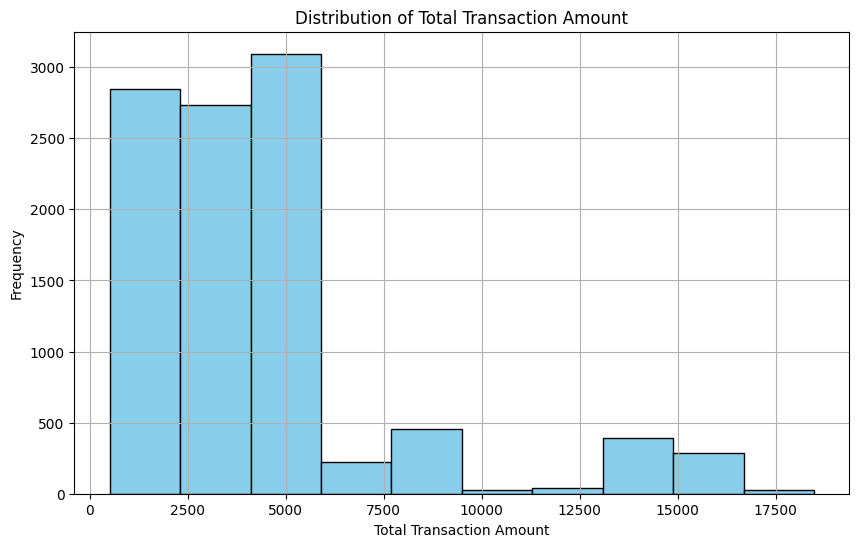

In [ ]:
#How is the total transaction amount distributed?
# Plotting the distribution of Total_Trans_Amt
plt.figure(figsize=(10, 6))
plt.hist(data['Total_Trans_Amt'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

2.What is the distribution of hte education level of the customers
*  The distribution of total transaction amount appears to be right-skewed, indicating that most customers have lower transaction amounts, with a few customers having significantly higher transaction amounts.

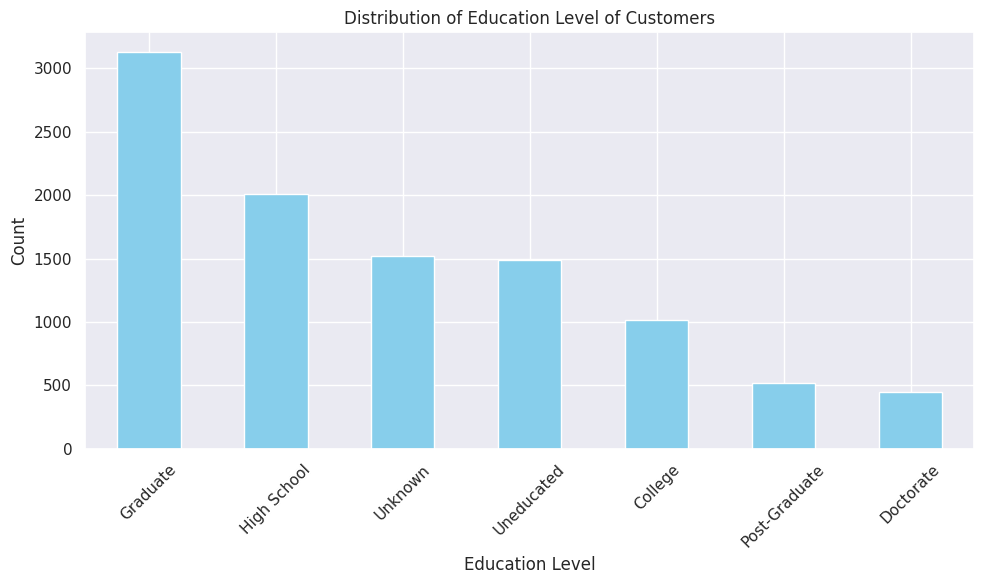

In [ ]:
# Check the unique values in the 'Education_Level' column
education_distribution = data['Education_Level'].value_counts()

# Plot the distribution of education levels
plt.figure(figsize=(10, 6))
education_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Education Level of Customers')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3.What is the distribution of the income level of the customers?
The distribution of income categories shows that there is diversity in the income levels of customers, with 'Less than $40K' being the most common category.

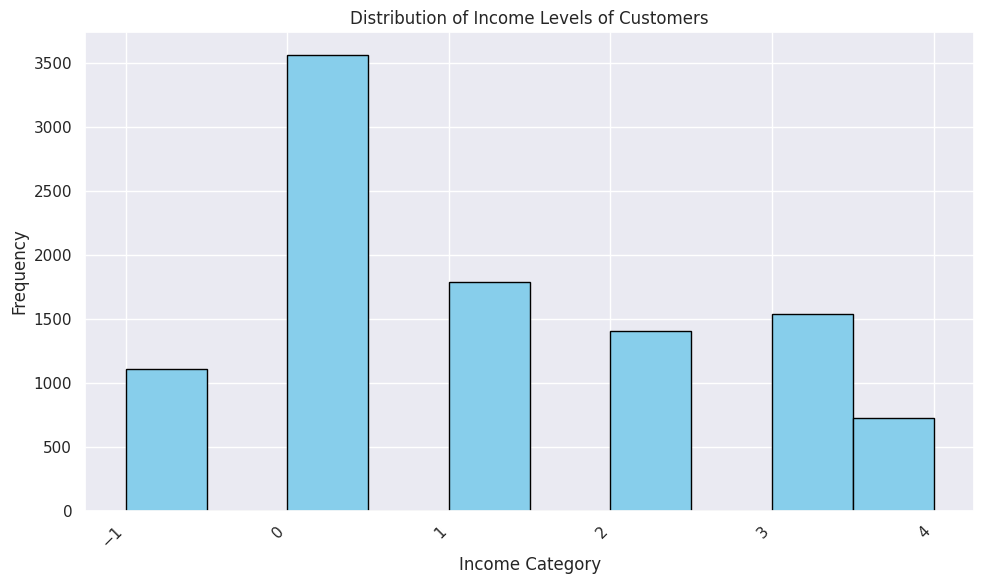

In [ ]:
# Extracting income levels
income_levels = data['Income_Category']

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(income_levels, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Income Category')
plt.ylabel('Frequency')
plt.title('Distribution of Income Levels of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?
Existing customers generally have higher changes in transaction amounts compared to attrited customers.

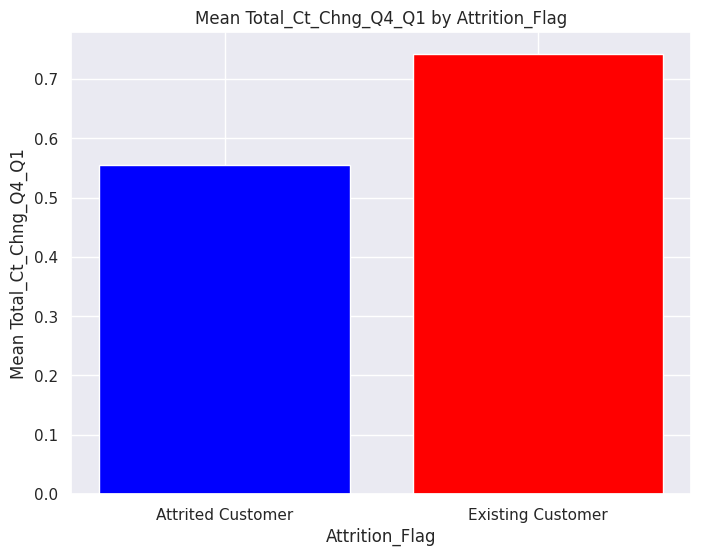

In [ ]:

# How the change in transaction amount between Q4 and Q1 vary by the customer account status?
# Group by Attrition_Flag and calculate the mean of Total_Ct_Chng_Q4_Q1
grouped = data.groupby('Attrition_Flag')['Total_Ct_Chng_Q4_Q1'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(grouped['Attrition_Flag'], grouped['Total_Ct_Chng_Q4_Q1'], color=['blue', 'red'])
plt.title('Mean Total_Ct_Chng_Q4_Q1 by Attrition_Flag')
plt.xlabel('Attrition_Flag')
plt.ylabel('Mean Total_Ct_Chng_Q4_Q1')
plt.show()

5.How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?

Attrited customers's average months of account inactive is greater than active customers.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
 #Calculate average months inactive by account status
avg_inactive_months = data.groupby('Attrition_Flag')['Months_Inactive_12_mon'].mean()

print(avg_inactive_months)

Attrition_Flag
Attrited Customer   2.693
Existing Customer   2.274
Name: Months_Inactive_12_mon, dtype: float64


6, What are the attributes that have a strong correlation with each other?Attributes such as 'Total_Trans_Amt' (Total Transaction Amount), 'Total_Trans_Ct' (Total Transaction Count), 'Total_Ct_Chng_Q4_Q1' (Change in Transaction Count Q4-Q1), and 'Total_Relationship_Count' show relatively strong positive correlations with each other. This indicates that as one of these attributes increases, the others tend to increase as well. Conversely, 'Avg_Utilization_Ratio' (Average Card Utilization Ratio) shows a negative correlation with 'Avg_Open_To_Buy' (Average Open to Buy), which is expected as higher card utilization usually corresponds to lower available credit.


In [ ]:
# # Calculate correlation matrix
# corr_matrix = data.corr()
# strong_correlation = corr_matrix[abs(corr_matrix) > 0.7]
# strong_correlation_pairs = (strong_correlation.where(np.triu(np.ones(strong_correlation.shape), k=1).astype(bool))
#                  .stack()
#                  .sort_values(ascending=False))
# print(strong_correlation_pairs)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<!-- #### The below functions need to be defined to carry out the Exploratory Data Analysis. -->
##Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Observation in Customer age:
Most bank customers are around 46 years old.The Median and the mean are very

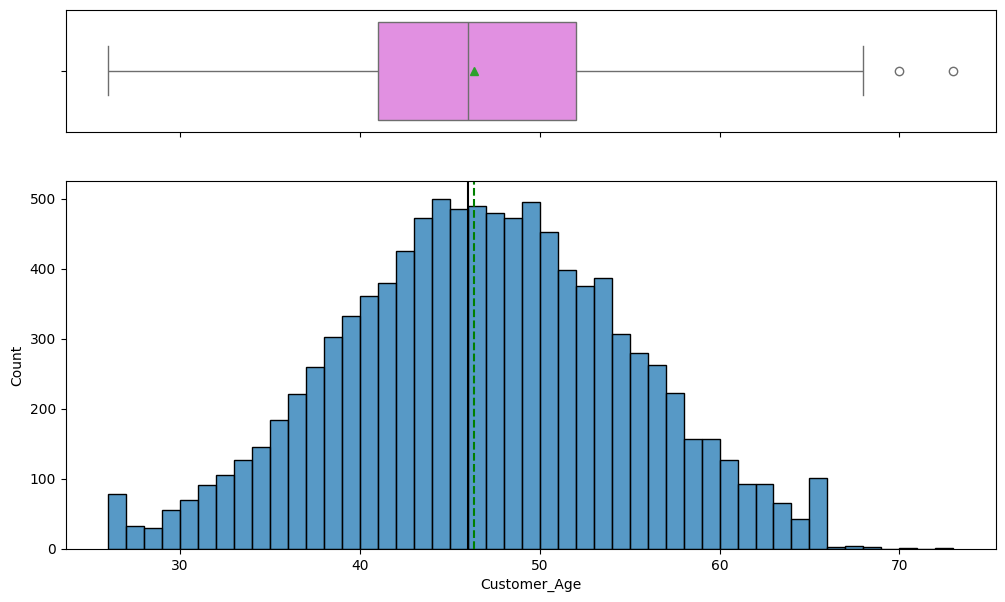

In [ ]:
# Observations on Customer_age
histogram_boxplot(data, "Customer_Age")

Observation in Total Trans Amt
1. Mean Total Transaction Amount: The mean total transaction amount is approximately $4404.08.

 2.Median Total Transaction Amount: The median total transaction amount is $3899.0. This means that half of the transactions fall below this value and half fall above it when sorted in ascending order. Unlike the mean, the median is not as affected by extreme values.

3. Comparison between Mean and Median: The fact that the median is lower than the mean suggests that there might be a few customers with very high transaction amounts that are pulling the mean upward as reflected by the outlyers. This indicate the presence of some high-value transactions that are influencing the average transaction amount.

4. Spending Behavior: The median transaction amount being lower than the mean indicates that there is some variability in transaction amounts, with a portion of customers making transactions significantly higher than the average. Understanding the distribution of transaction amounts can help the bank tailor their services and offerings to different customer segments more effectively.

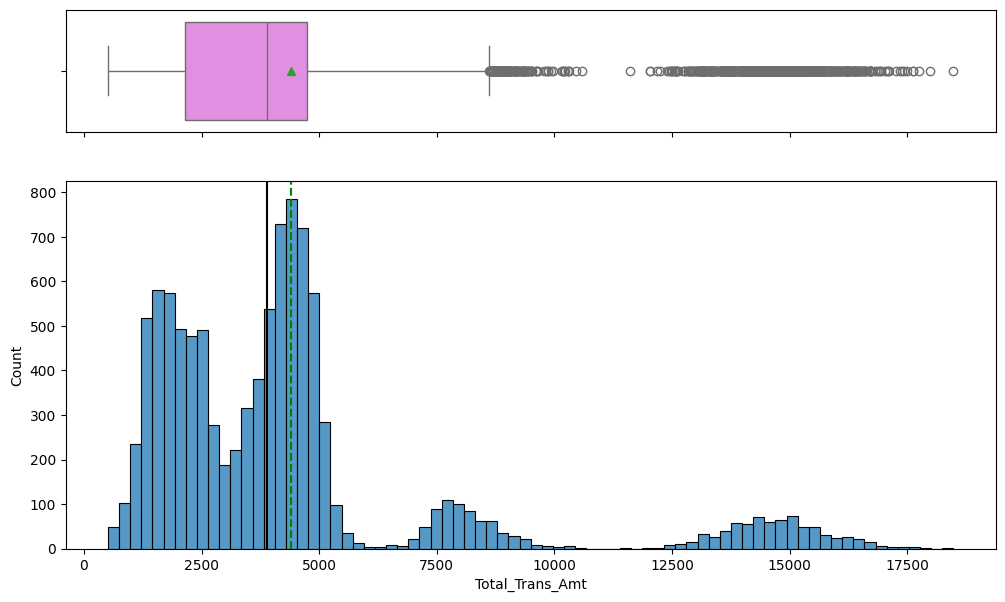

In [ ]:
histogram_boxplot(data, "Total_Trans_Amt")

In [ ]:
# Calculating mean and median of 'Total_Trans_Amt'
mean_trans_amt = data['Total_Trans_Amt'].mean()
median_trans_amt = data['Total_Trans_Amt'].median()

print("Mean Total Transaction Amount:", mean_trans_amt)
print("Median Total Transaction Amount:", median_trans_amt)

Mean Total Transaction Amount: 4404.086303939963
Median Total Transaction Amount: 3899.0


Observation in depedents:
* Customers have between 0 and 5 dependents. Most customers have 2 children.

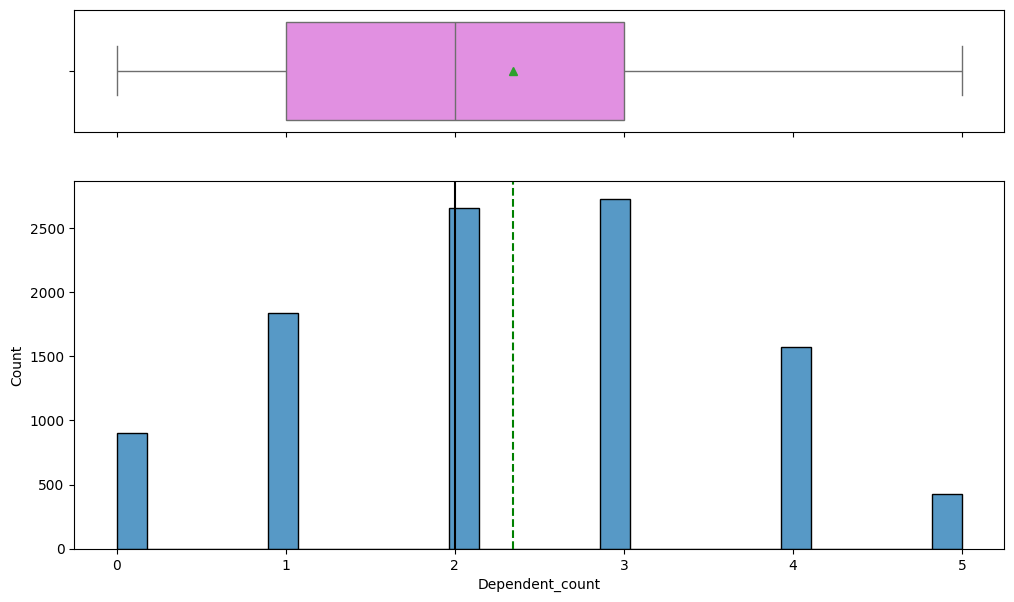

In [ ]:
histogram_boxplot(data, "Dependent_count")

Observation in Total_Relationship_count
* The mean total relationship count among the customers in the dataset is approximately 3.81.
* The median total relationship count is 4.0, which indicates that half of the customers have a total relationship count of 4 or below, and the other half have a total relationship count of 4 or above.
* Conclusion: The fact that the mean is slightly lower than the median suggests that the distribution of the total relationship count might be slightly skewed towards lower values, with some customers having a relatively high count compared to the majority.

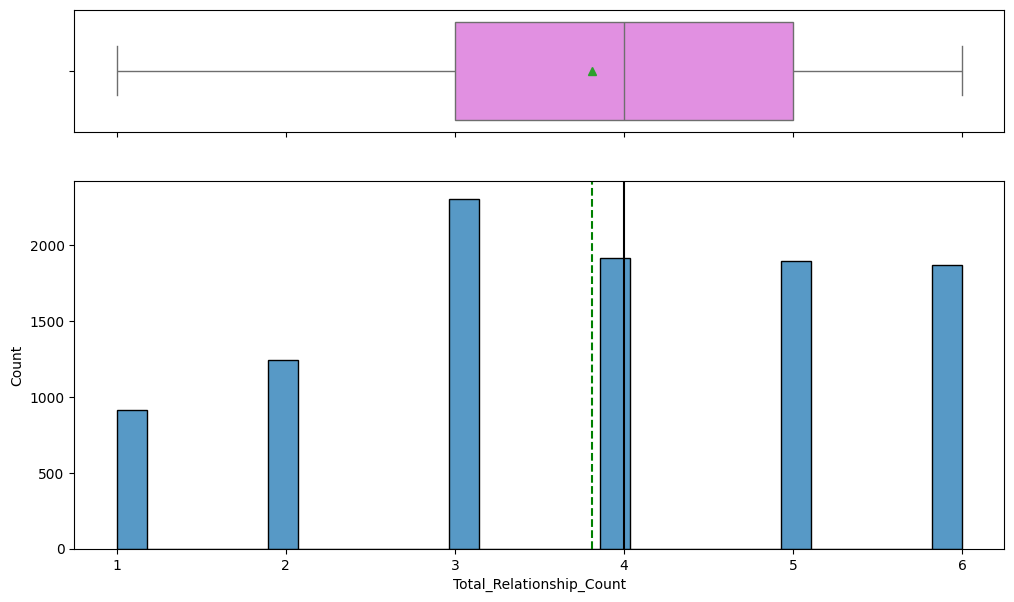

In [ ]:
histogram_boxplot(data, "Total_Relationship_Count")

In [ ]:
# Calculating mean and median of 'Total_Trans_Amt'
mean_trans_amt = data['Total_Relationship_Count'].mean()
median_trans_amt = data['Total_Relationship_Count'].median()

print("Mean Total_Relationship_Count:", mean_trans_amt)
print("Median Total_Relationship_Count:", median_trans_amt)

Mean Total_Relationship_Count: 3.8125802310654686
Median Total_Relationship_Count: 4.0


Observation Total_Trans_Ct:
* Mean Total_Trans_Ct:
The mean total transaction count (Total_Trans_Ct) across all customers is approximately 64.86.
This indicates that, on average, customers conduct around 64 transactions within the observed period.

* The median total transaction count is 67.
Since the median is slightly higher than the mean, it suggests that the distribution of total transaction counts might be slightly right-skewed, with more customers having transaction counts closer to or above the median.

* Interpretation:

The mean and median values provide insights into the central tendency of the total transaction counts among all customers.
While the mean and median are relatively close, suggesting a somewhat symmetric distribution, the median being slightly higher indicates a possible skewness towards higher transaction counts as also indicated by the outliers.


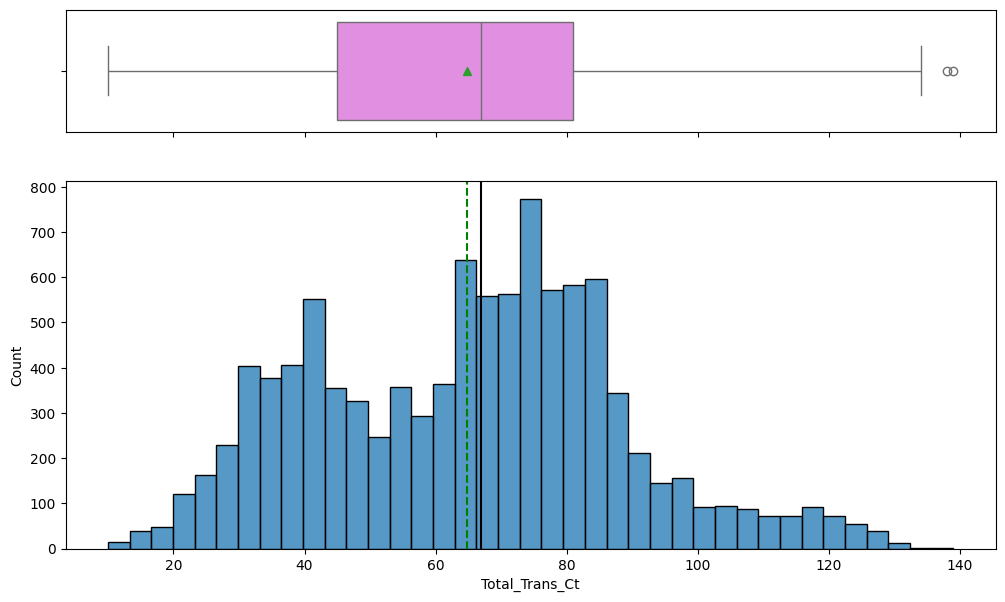

In [ ]:
histogram_boxplot(data, "Total_Trans_Ct")

In [ ]:
# Calculating mean and median of 'Total_Trans_Ct'
mean_Total_Trans_Ct = data['Total_Trans_Ct'].mean()
median_Total_Trans_Ct = data['Total_Trans_Ct'].median()

print("Mean Total_Trans_Ct:", mean_Total_Trans_Ct)
print("Median Total_Trans_Ct:", median_Total_Trans_Ct)

Mean Total_Trans_Ct: 64.85869457884863
Median Total_Trans_Ct: 67.0


In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Observation about Gender:
More customers are females.

<ipython-input-23-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


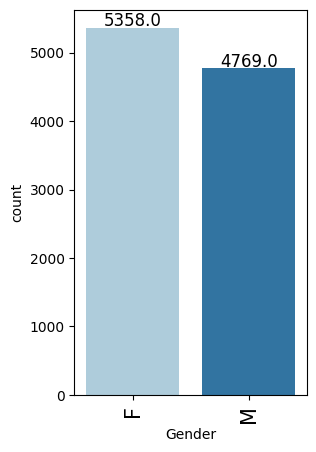

In [ ]:
labeled_barplot(data, "Gender")

Observation Education_Level
Most customers have a graduate degree.A few customes have a postgraduate and doctor degree

<ipython-input-21-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


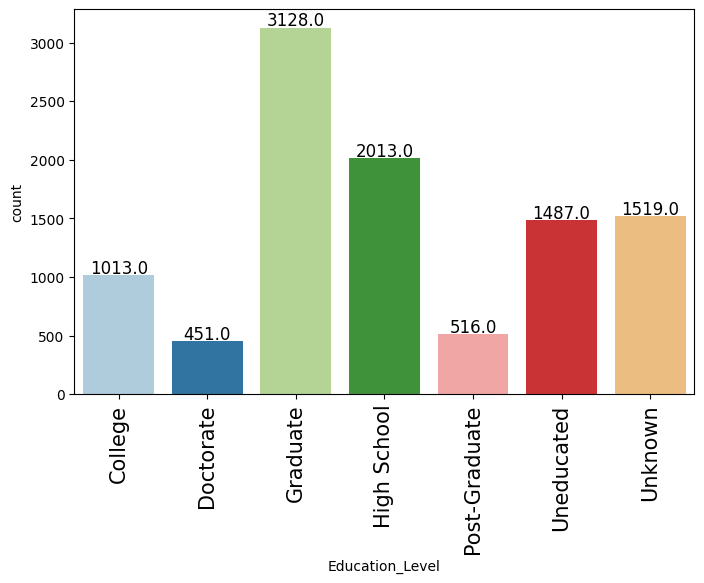

In [ ]:
labeled_barplot(data, "Education_Level")

Observation Dependent_count:
Most customers have a range of 2 and 3 dependents.
The customers' dependant range from 0 to five dependents.

<ipython-input-53-1e58b03272cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


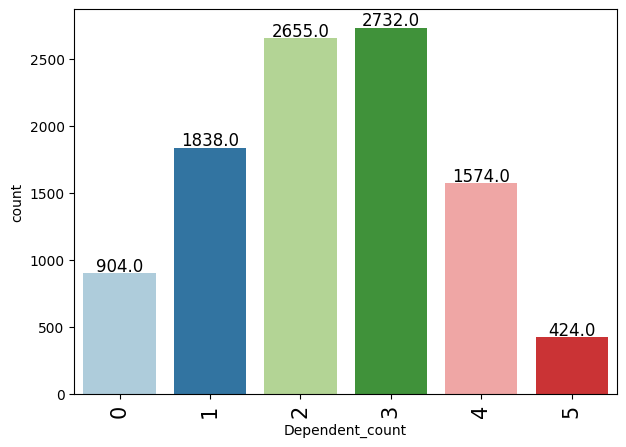

In [ ]:
labeled_barplot(data, 'Dependent_count')

Summary of the density distribution of the data:
Customer Age: The density distribution shows that there is a peak around the mid to late 40s, indicating that there are a significant number of customers in that age range.

Dependent Count: The density distribution  show a peak in 2 and 3 dependents, indicating common counts of dependents among customers is between 2 and 3.

Months on Book: There seems to be a relatively even distribution of customers across different durations they have been customers.

Credit Limit: The density distribution may indicate clusters of customers with certain credit limits. There might be peaks indicating common credit limits among customers.

Total Transaction Amount: The distribution might show a skewed pattern, with more customers having lower transaction amounts and a few having significantly higher transaction amounts.

Total Transaction Count: Similar to transaction amount, the distribution might show a skewed pattern with more customers having a lower count of transactions.

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


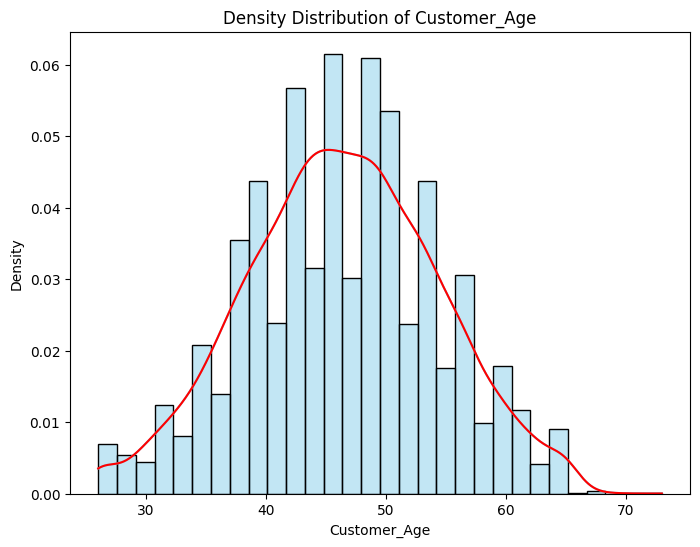

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


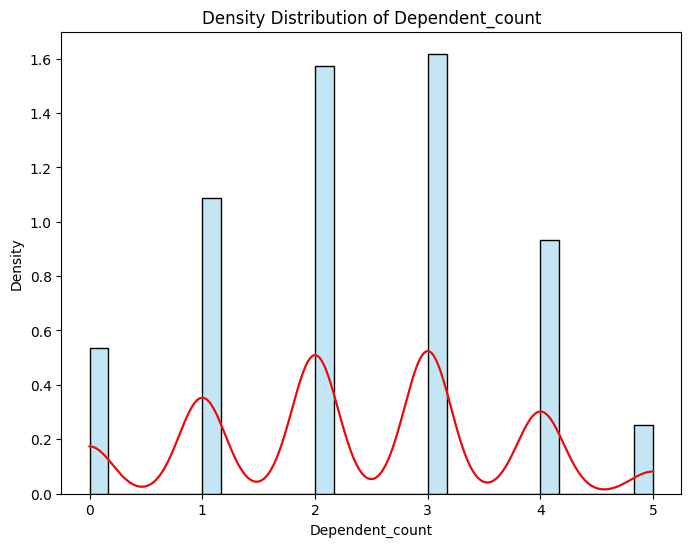

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


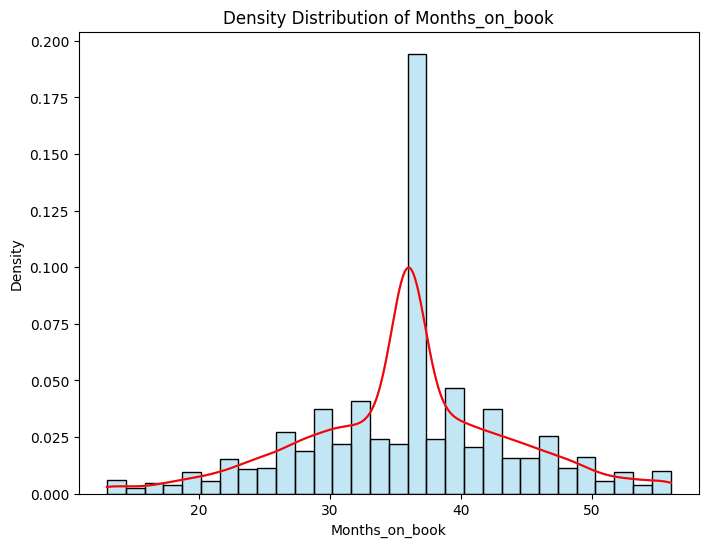

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


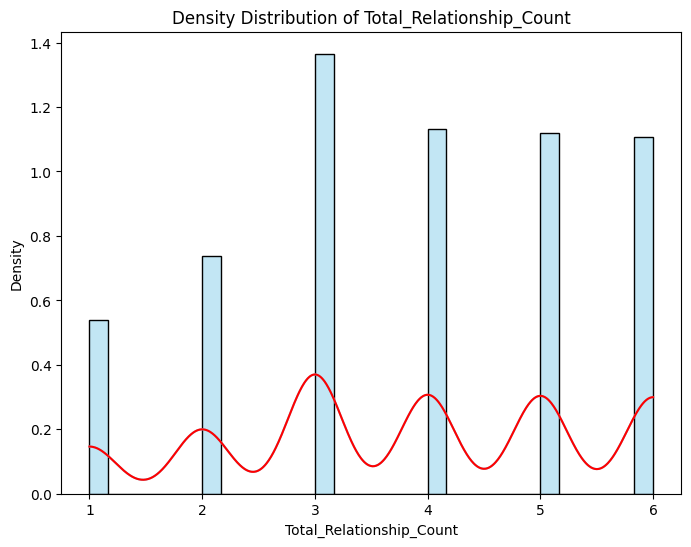

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


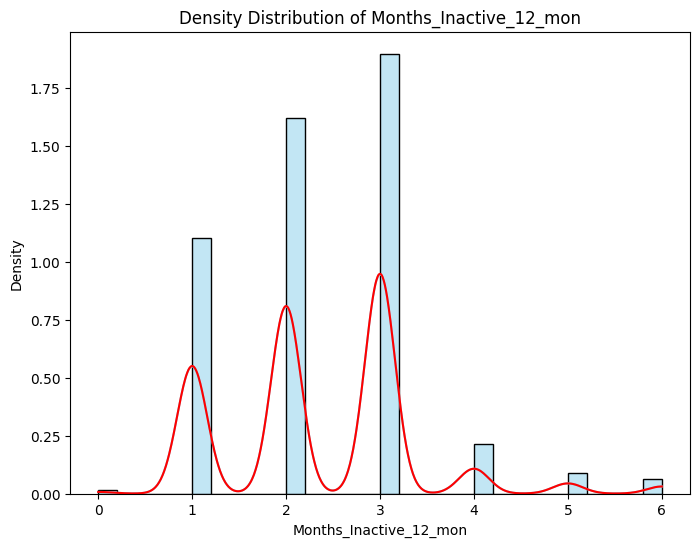

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


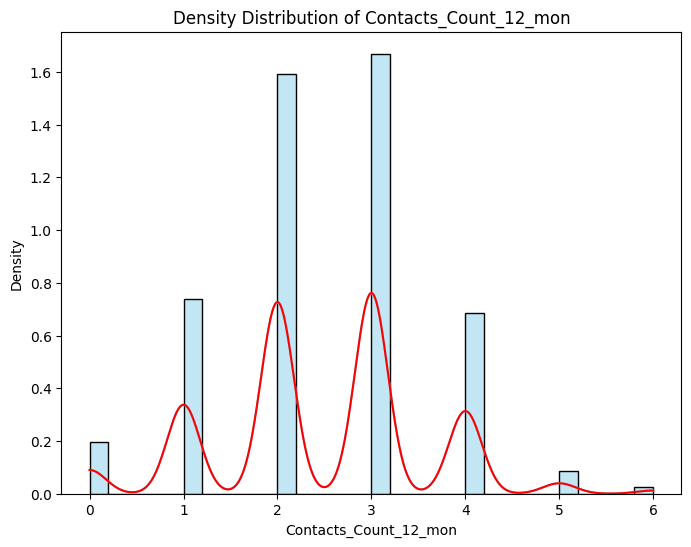

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


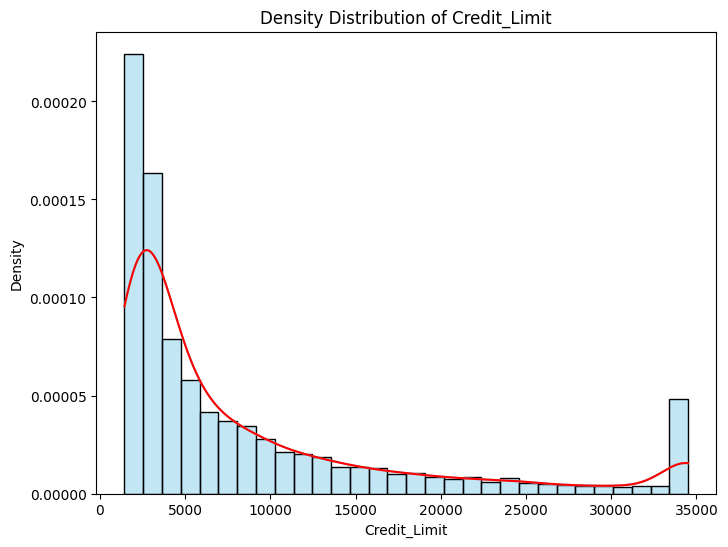

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


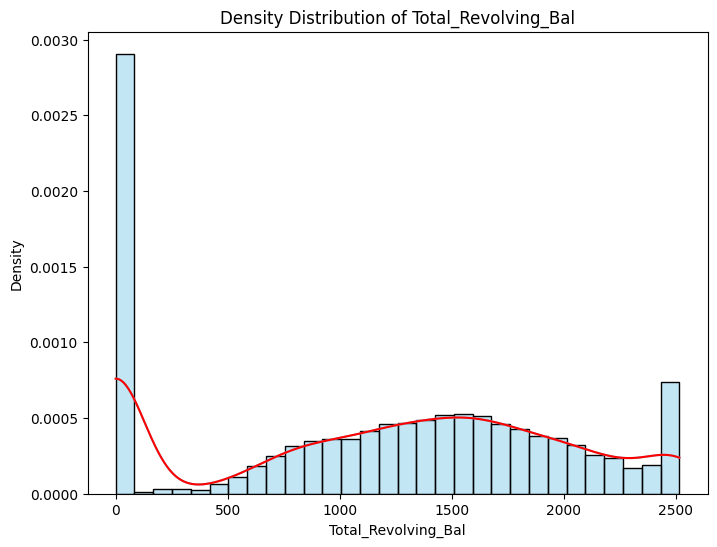

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


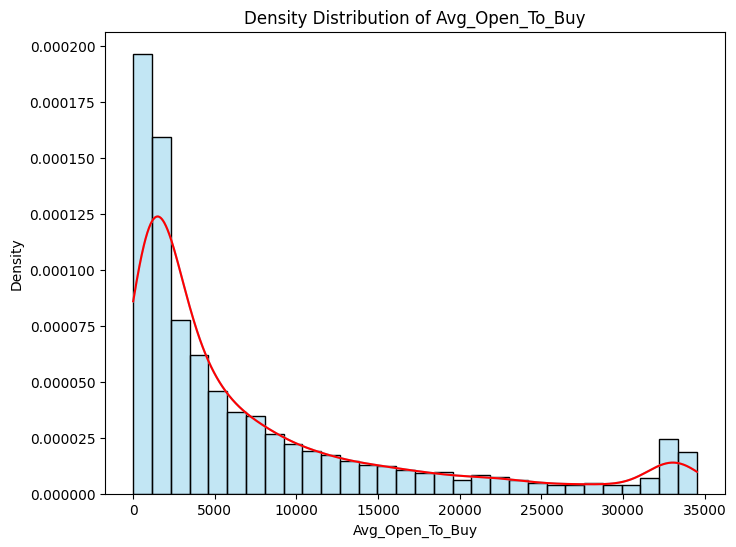

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


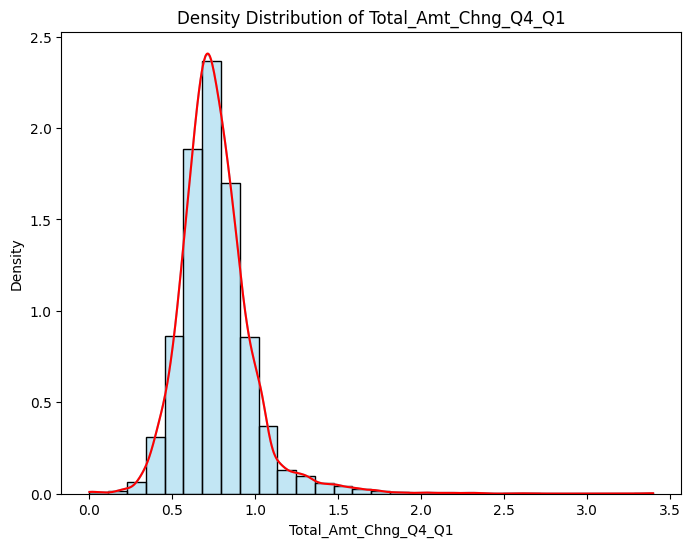

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


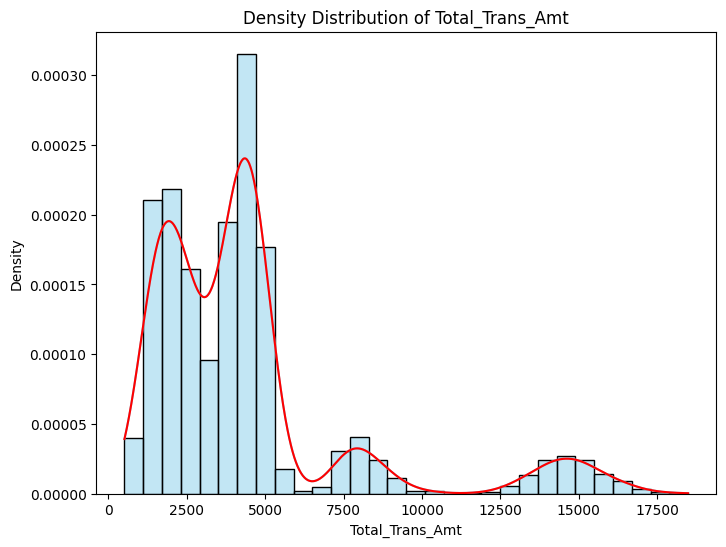

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


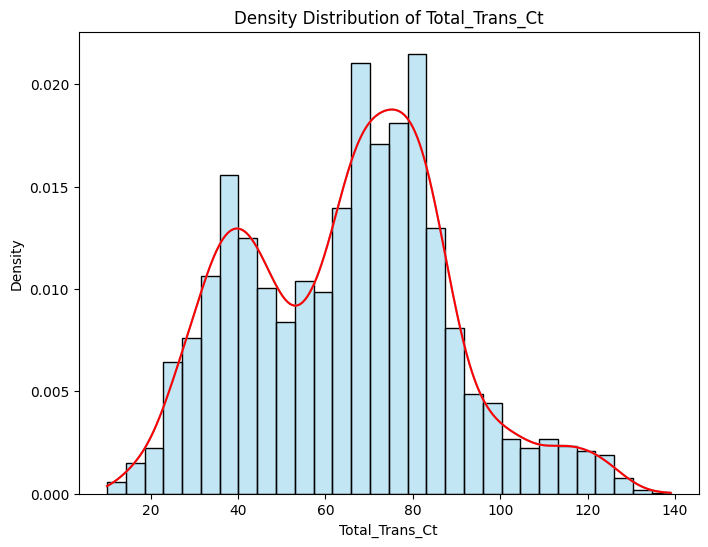

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


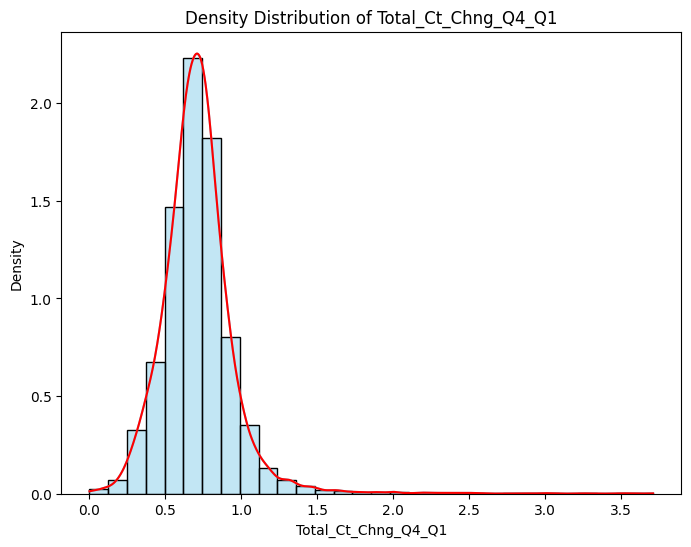

<ipython-input-26-58950c770369>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  x = pd.np.linspace(data[column].min(), data[column].max(), 1000)


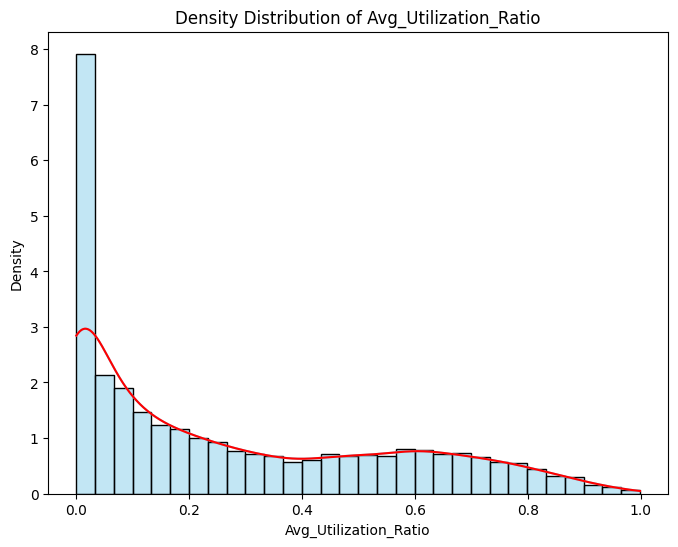

In [ ]:
#Function to plot density distribution of the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_density_distribution(data):
    """
    Plot density distribution for each column in the dataset.

    Parameters:
        data (DataFrame): Input dataset.
    """
    # Iterate over each column in the DataFrame
    for column in data.columns:
        if data[column].dtype in [int, float]:
            # Calculate kernel density estimation
            kde = gaussian_kde(data[column].dropna())
            # Generate x values for plotting
            x = pd.np.linspace(data[column].min(), data[column].max(), 1000)
            # Evaluate KDE at each x value
            y = kde(x)
            # Plot density distribution
            plt.figure(figsize=(8, 6))
            sns.histplot(data[column].dropna(), kde=True, stat='density', color='skyblue', bins=30)
            plt.plot(x, y, color='red')
            plt.title(f'Density Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Density')
            plt.show()


# Plot density distribution for each column
plot_density_distribution(data)

<Axes: xlabel='Attrition_Flag', ylabel='Customer_Age'>

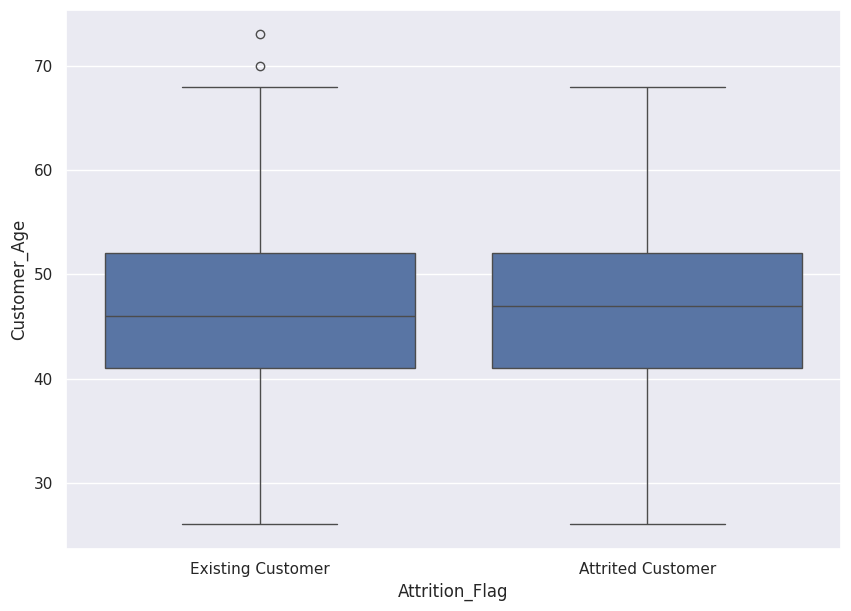

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=data, orient="vertical")

###Observation:
The median age  in the attrited customer is a bit higher than the existing customers

<Axes: xlabel='Attrition_Flag', ylabel='Gender'>

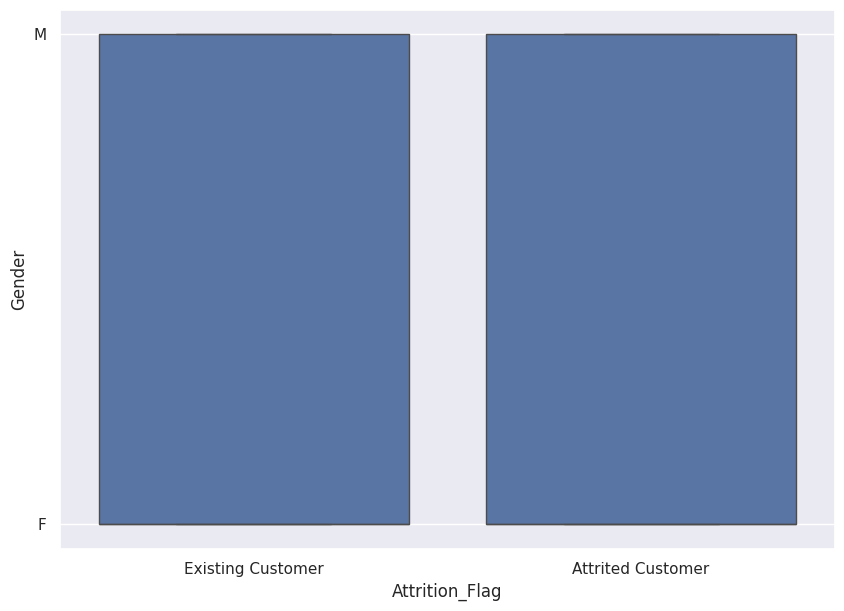

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Gender", data=data, orient="vertical")

###Observation:
Gender does not affect the attrition

<Axes: xlabel='Attrition_Flag', ylabel='Dependent_count'>

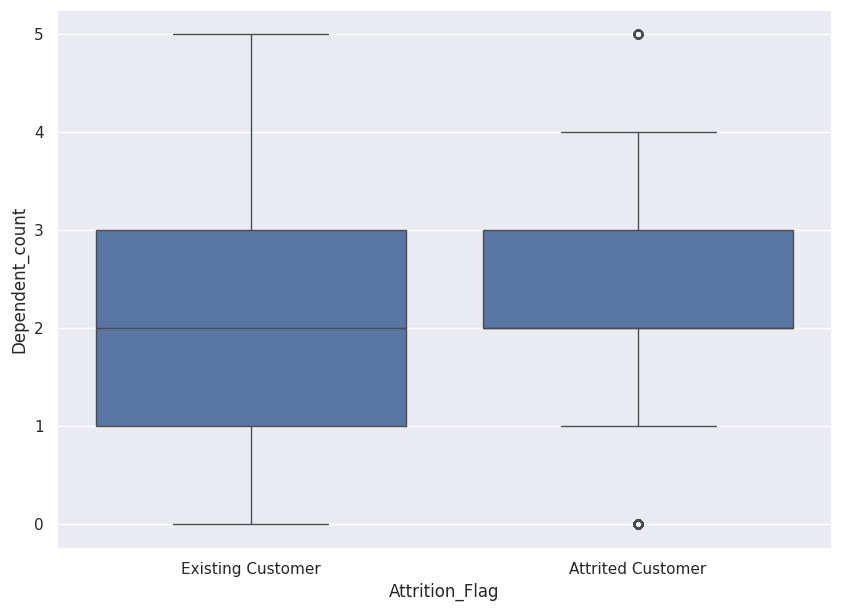

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Dependent_count", data=data, orient="vertical")

###Observation:
If there's a noticeable difference in the median or distribution of dependent counts between attrited and existing customers, it could imply that the number of dependents plays a role in customer attrition. Further analysis, possibly using statistical tests, could help confirm this relationship. The outliers for attricted customers might suggest unusual cases where the number of dependents deviates fro the typical range.

<Axes: xlabel='Attrition_Flag', ylabel='Education_Level'>

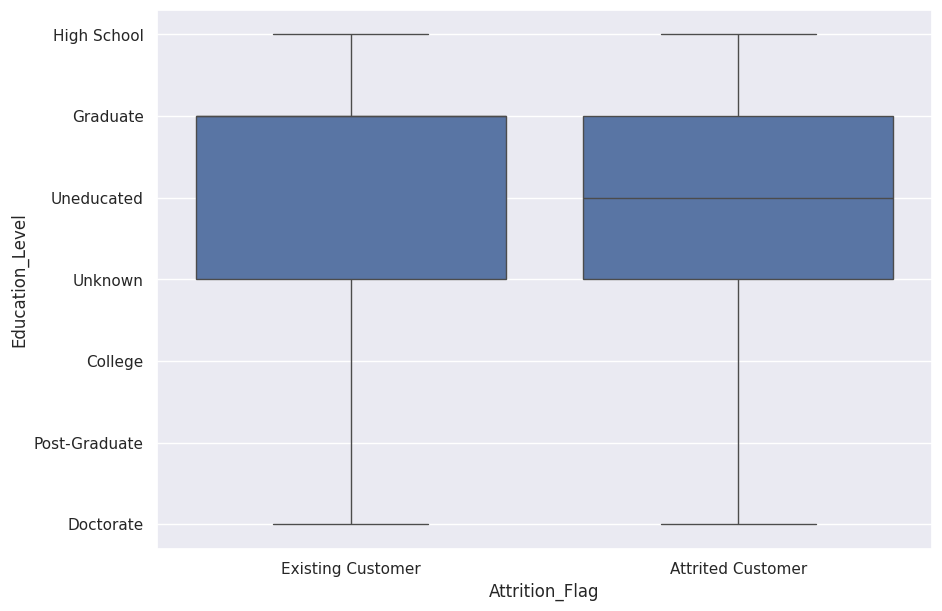

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Education_Level", data=data, orient="vertical")

###Observations:
Existing Customers:
The median education level appears to be higher for existing customers compared to attrited customers.
The spread of education levels seems relatively consistent, with fewer outliers.
Attrited Customers:
The median education level seems lower for attrited customers compared to existing customers.
There appears to be more variability in education levels among attrited customers, as indicated by the longer whiskers and more outliers.
Overall, there seems to be a difference in the distribution of education levels between existing and attrited customers. This could imply that education level may play a role in customer attrition, with certain education levels being more prone to attrition than others.

<Axes: xlabel='Attrition_Flag', ylabel='Income_Category'>

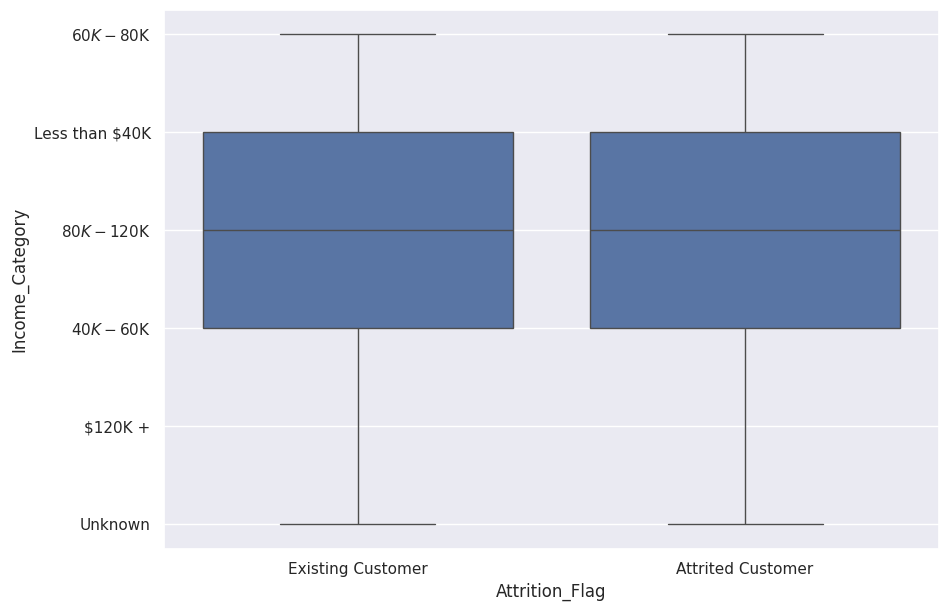

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Income_Category", data=data, orient="vertical")

There is not substantial pattern between income category for existing customers and attrituted customers.

<Axes: xlabel='Attrition_Flag', ylabel='Months_on_book'>

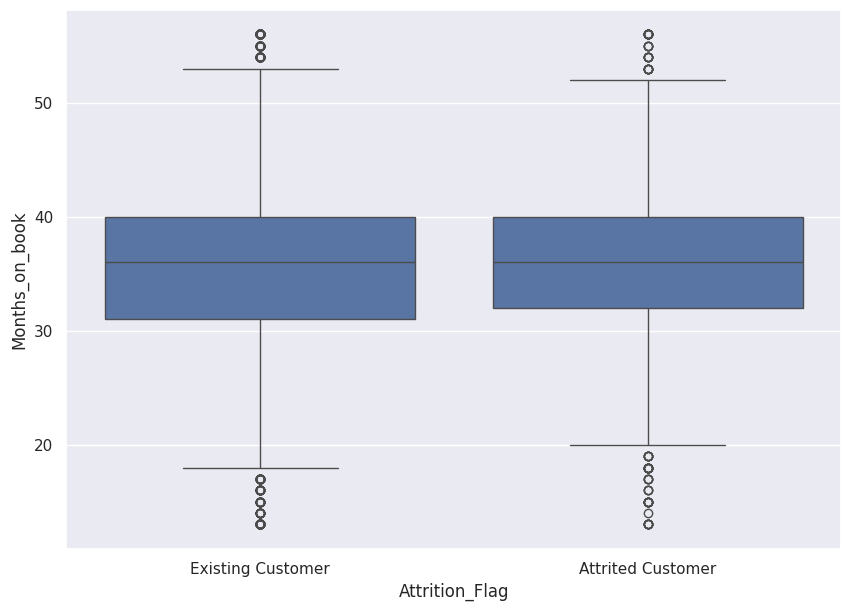

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Months_on_book", data=data, orient="vertical")

*  For both existing and attrited customers, the range of months_on_book varies. The existing customers seem to have a wider range, indicating that there are customers who have been with the bank for varying durations, while attrited customers show a relatively narrower range.

* The median months_on_book for existing customers appears to be higher compared to attrited customers. This suggests that, on average, existing customers have been with the bank for a longer duration before the time of observation, whereas attrited customers have a lower median months_on_book.

* There seem to be some outliers present, particularly in the existing customer group, indicating some customers who have been with the bank for a significantly longer duration compared to others.

* The boxplot suggests that there might be a relationship between attrition and the duration of the customer relationship. It appears that customers who have been with the bank for a shorter duration are more likely to attrite compared to those with longer relationships.

<Axes: xlabel='Attrition_Flag', ylabel='Months_Inactive_12_mon'>

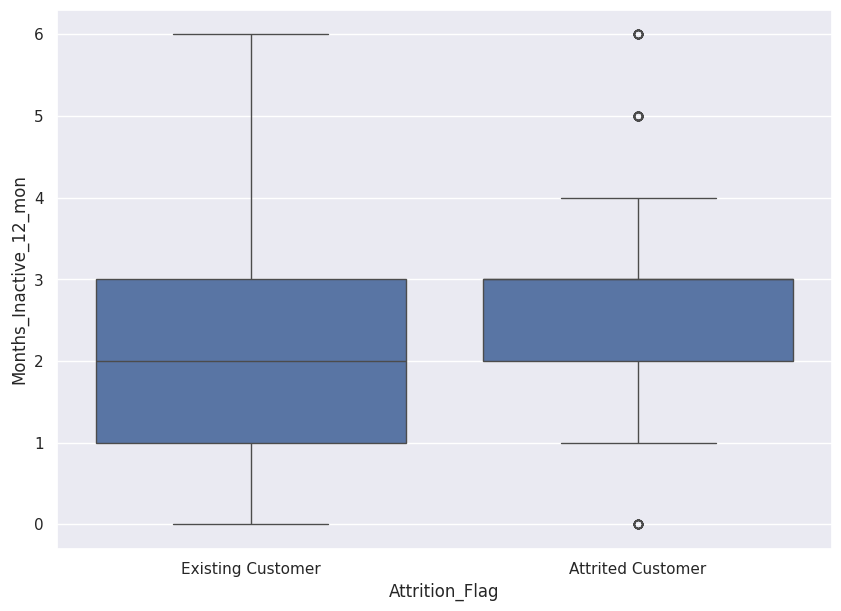

In [ ]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon", data=data, orient="vertical")

###Observation:
The higher median for attrited customers suggests that, on average, they tend to have a higher number of months of inactivity compared to existing customers. The outliers for Attrited customers indicate customers with exceptional high or low months activities.

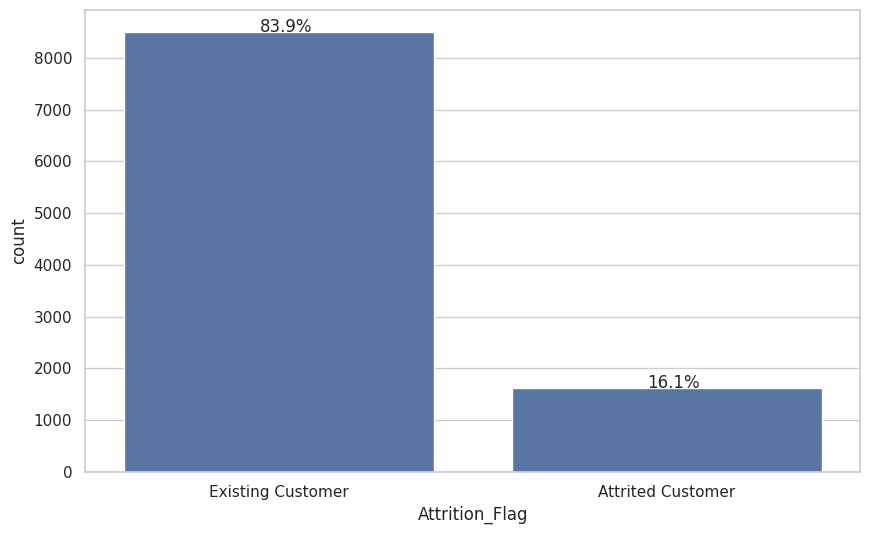

In [ ]:
def perc_on_bar(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame containing the dataset
# and 'column' is the column for which you want to create the bar plot with percentages

# Replace 'column' with the desired column name from your dataset
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plot = sns.countplot(data=data, x='Attrition_Flag')
perc_on_bar(plot, data['Attrition_Flag'])

###Observation:
High Imbalance in data since the existing vs. attrited customers ratio is 84:16

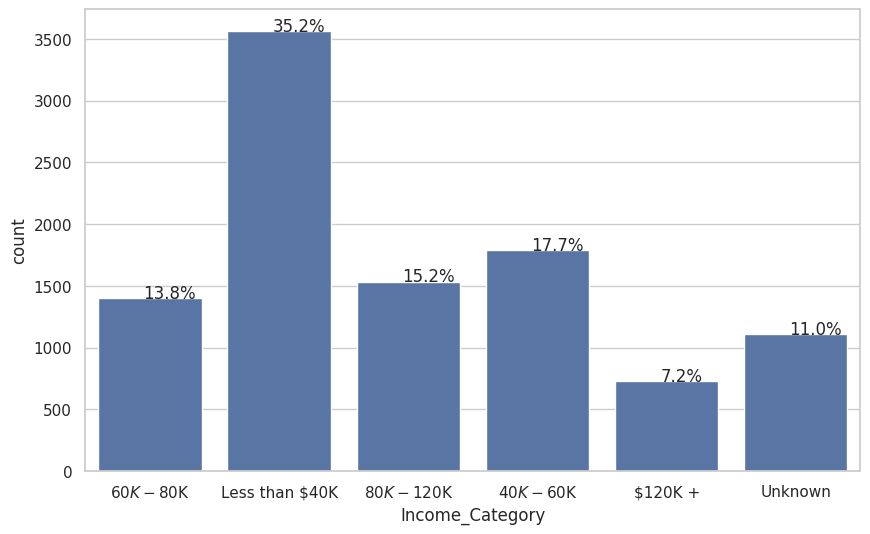

In [ ]:
def perc_on_bar(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame containing the dataset
# and 'column' is the column for which you want to create the bar plot with percentages

# Replace 'column' with the desired column name from your dataset
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plot = sns.countplot(data=data, x='Income_Category')
perc_on_bar(plot, data['Income_Category'])

###Observation:
35% customers earn less than $40k and 36% earns $60k or more

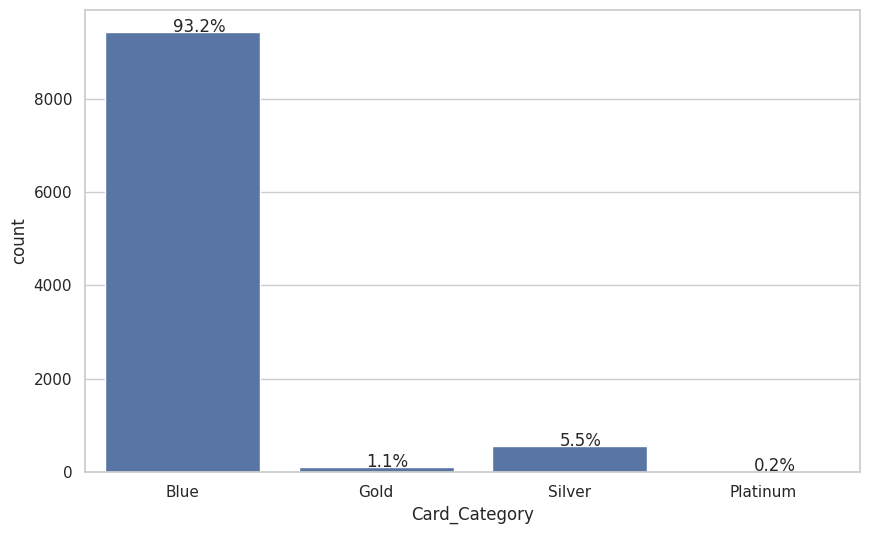

In [ ]:
def perc_on_bar(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame containing the dataset
# and 'column' is the column for which you want to create the bar plot with percentages

# Replace 'column' with the desired column name from your dataset
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plot = sns.countplot(data=data, x='Card_Category')
perc_on_bar(plot, data['Card_Category'])

###Observation:
93% customers have Blue card

###Summary of the Univariate Analysis


##Bivariate Analysis
Most customers are 46 years old, with some customers having age older than 66 years old.
Total Transaction Amount Distribution: The distribution of total transaction amount appears to be right-skewed, indicating that most customers have lower transaction amounts, with a few customers having significantly higher transaction amounts.

Education Level Distribution: The distribution of education levels shows that there are various education levels among customers, with 'Graduate' being the most common, followed by 'High School' and 'Uneducated'.

Income Category Distribution: The distribution of income categories shows that there is diversity in the income levels of customers, with 'Less than $40K' being the most common category.

Change in Transaction Amount by Account Status: There seems to be a difference in the change in transaction amount (Total_Ct_Chng_Q4_Q1) between existing customers and those who left ('Attrition_Flag' = 'Attrited Customer'). Existing customers generally have higher changes in transaction amounts compared to attrited customers.

Months Inactive Variation by Account Status: There appears to be a difference in the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) between existing customers and attrited customers. Attrited customers tend to have slightly higher median months of inactivity compared to existing customers.

In [ ]:
# # Plotting correlation heatmap of the features
# codes = {'Existing Customer':0, 'Attrited Customer':1}
# data_clean = data.copy()data_clean['attrition_flag'] = data_clean['attrition_flag'].map(codes).astype(int)



# sns.set(rc={"figure.figsize": (15, 15)})
# sns.heatmap(
#     data_clean.corr(),
#     annot=True,
#     linewidths=0.5,
#     center=0,
#     cbar=False,
#     cmap="YlGnBu",
#     fmt="0.2f",
# )
# plt.show()

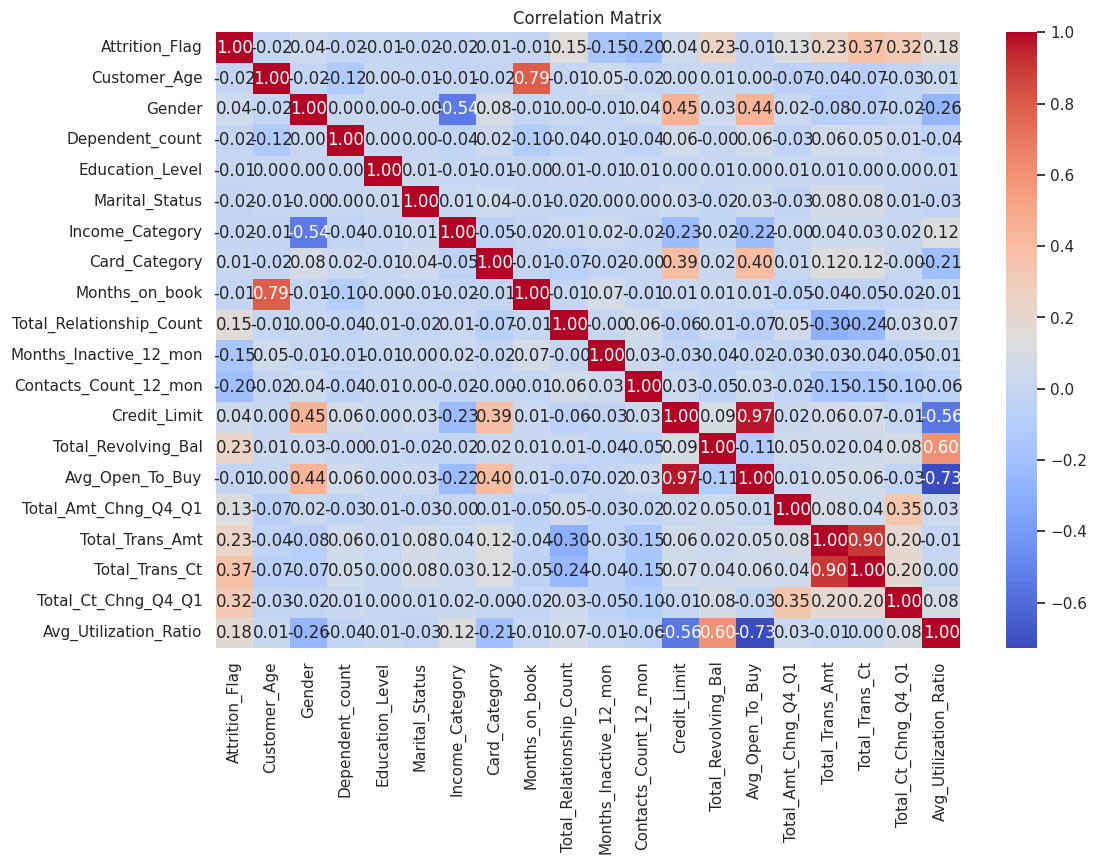

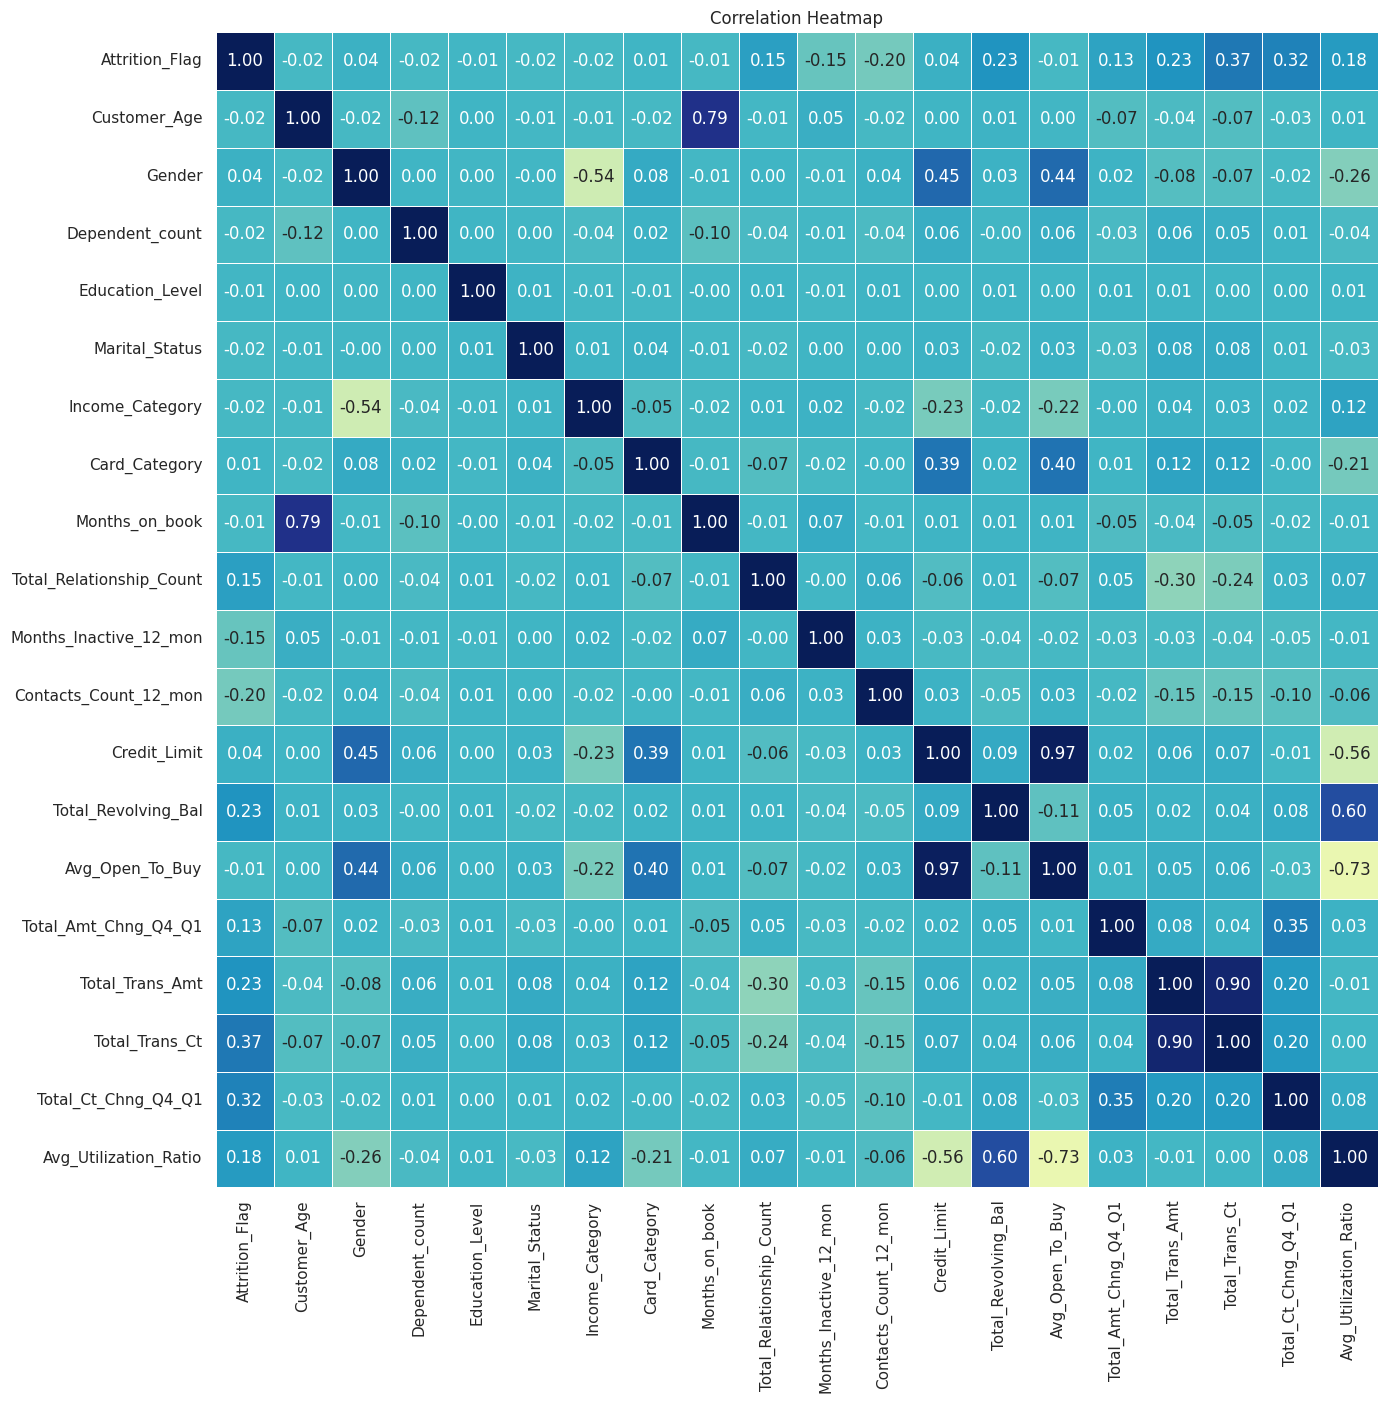

In [ ]:

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plot correlation heatmap of the features
plt.figure(figsize=(15, 15))
sns.heatmap(
    correlation_matrix,
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f"
)
plt.title('Correlation Heatmap')
plt.show()

###Observation of the correlation:
* Correlation Matrix: Attributes such as Total Transaction Amount,  Total Transaction Count, Change in Transaction Count Q4-Q1, and Total_Relationship_Count show relatively strong positive correlations with each other.

* This indicates that as one of these attributes increases, the others tend to increase as well.

* Conversely, Avg_Utilization_Ratio shows a negative correlation with Average Open to Buy, which is expected as higher card utilization usually corresponds to lower available credit.

* Months on book and Customer Age have strong correlation

* Credit Limit and Average Open to Buy have 100% collinearity.

* Months on book and Customer Age have quite strong correlation.

* Average Utilization Ration and Total Revolving Balance are also a bit correlated it appears that Attrition Flag does not have highly strong correlation with any of the numeric variables.
* Attricio is uncorrelated with Customer Age, Dependent Count, Months on Book, Open to Buy, Credit Limit, we'll remove these from dataset


In [ ]:
sns.pairplot(data, hue="Attrition_Flag")

###Summary of the correlation of the data in the dataset.

* Customer Age vs. Total Transaction Amount:
Existing customers tend to have a wider spread of ages compared to attrited customers.
Attrited customers generally show lower total transaction amounts across different age groups.

* Total Relationship Count vs. Total Transaction Count:
There is a positive correlation between total relationship count and total transaction count for both existing and attrited customers.
However, existing customers tend to have higher counts in both aspects compared to attrited customers.

* Credit Limit vs. Average Open To Buy:
Both existing and attrited customers seem to have a positive correlation between credit limit and average open to buy.
Attrited customers appear to have a lower spread in credit limit and open to buy compared to existing customers.

* Months on Book vs. Total Revolving Balance:

There doesn't seem to be a clear trend between months on book and total revolving balance for either existing or attrited customers.
However, existing customers seem to have a wider range of months on book compared to attrited customers.

* Average Utilization Ratio vs. Total Amount Change Q4-Q1:

There is a noticeable cluster of points for existing customers showing a higher average utilization ratio and total amount change Q4-Q1 compared to attrited customers.
Attrited customers seem to have a wider spread in average utilization ratio but lower total amount change Q4-Q1.

* Dependent Count vs. Total Transaction Amount:
There doesn't appear to be a significant correlation between dependent count and total transaction amount for either group.

Both existing and attrited customers show similar distributions across different dependent count values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Observation regarding the transaction amount change between Q4 and Q1 by attrition flag.
* The total transaction amount for active bank customers increased in the total amount from the end of the year (Q4) to the beginning of the following year(Q1), with also experience outliers from 1.8 to 3.5 total transaction amount.Attrited customers outliers go up to 1.5 total  transaction  amount change (Q4) Q1.  


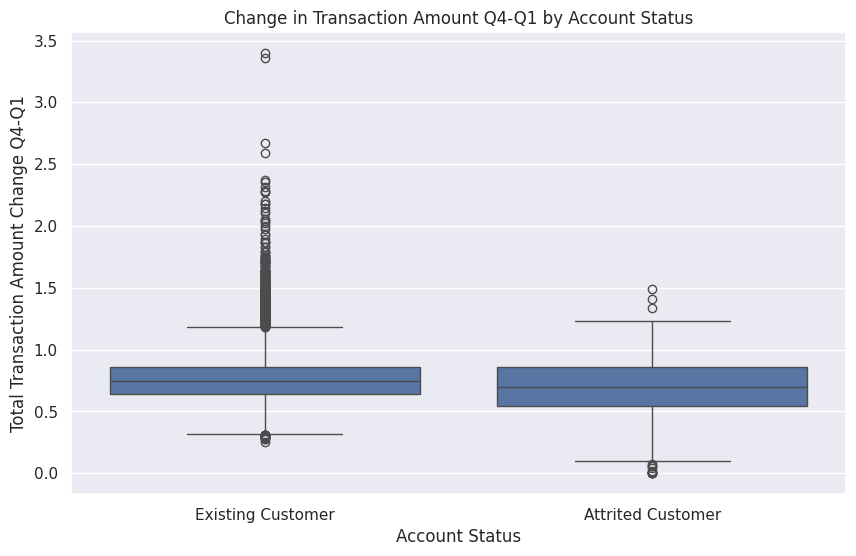

In [ ]:
# How does the change in transaction amount between Q4 and Q1 vary by the customer's account status (Attrition_Flag)?
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1')
plt.title('Change in Transaction Amount Q4-Q1 by Account Status')
plt.xlabel('Account Status')
plt.ylabel('Total Transaction Amount Change Q4-Q1')
plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


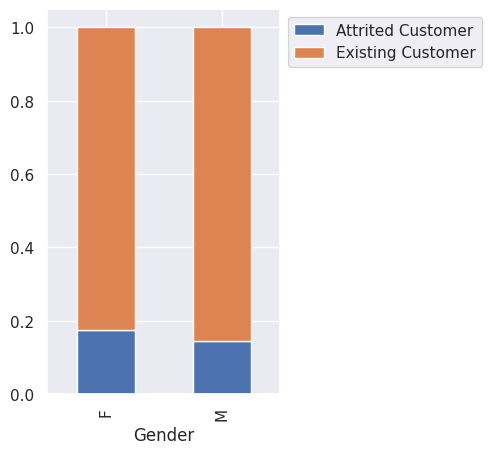

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
Unknown                        187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


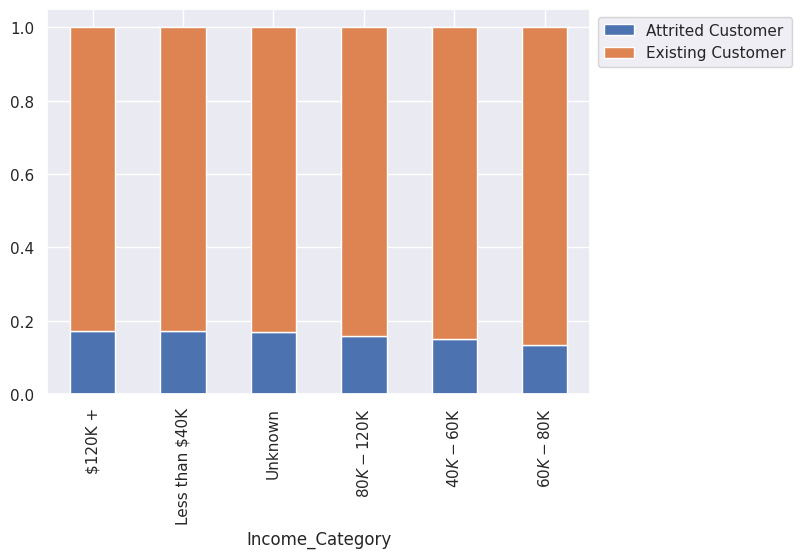

In [ ]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
All                           1627               8500  10127
Graduate                       487               2641   3128
High School                    306               1707   2013
Unknown                        256               1263   1519
Uneducated                     237               1250   1487
College                        154                859   1013
Doctorate                       95                356    451
Post-Graduate                   92                424    516
------------------------------------------------------------------------------------------------------------------------


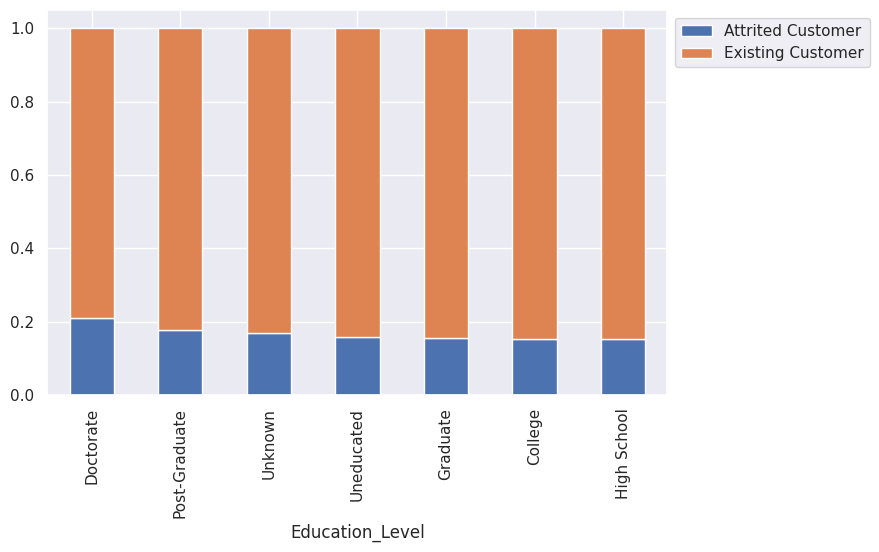

In [ ]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

###Observation regarding education level correlation:
Education level does not appear to have any effect in attrition

###Observation regarding correlation between attrition and income category
Attrition is not related to income category

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


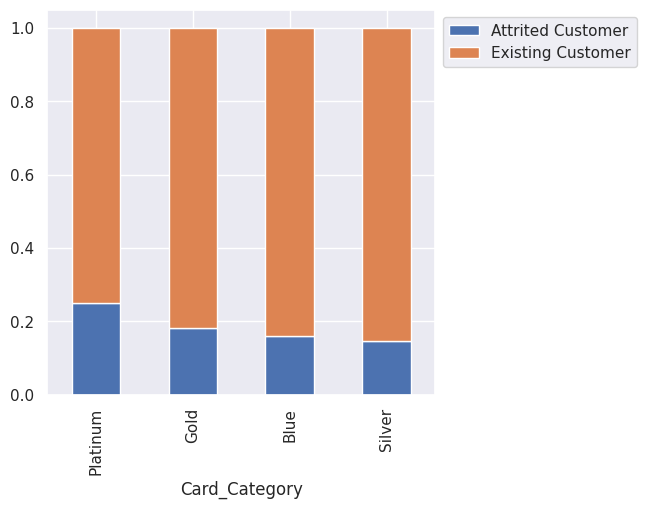

In [ ]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
All                          1627               8500  10127
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
Divorced                      121                627    748
------------------------------------------------------------------------------------------------------------------------


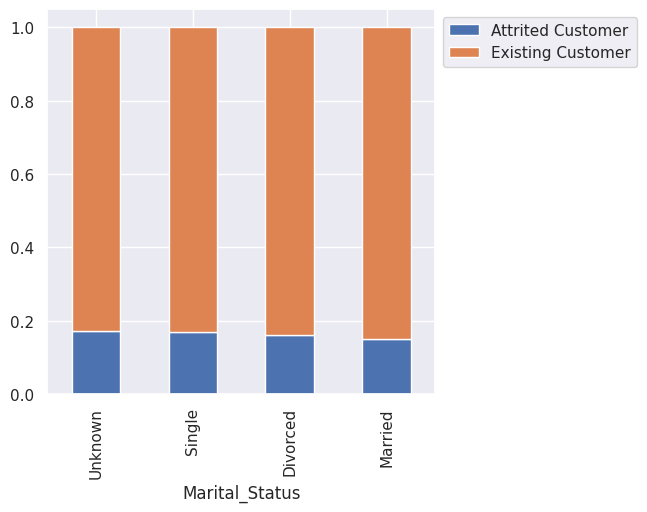

In [ ]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

###Observation regarding correlation between marital status and attrition
Appears that marital status does not affect attrition.

###Observation about correlation between attrition and credit card
Most attrited customer have a platinum credit card.

###Observation about correlation between attrited customers and gender
It appears that there are more females attrited customers than males.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## Data Pre-processing

###Preprocessing steps
* Split data into dependent and target sets
* split data to train, test and validation set
* standarize feature names
* Drop no needed columns
* Treat the missing values
* Encode
* Outlier treatment


In [ ]:
category()

Category columns with unique values: Attrition_Flag
------------------------------------------------------------------------------------------
                   Count  Percentage
Attrition_Flag                      
Existing Customer   8500      83.934
Attrited Customer   1627      16.066
------------------------------------------------------------------------------------------
Category columns with unique values: Gender
------------------------------------------------------------------------------------------
        Count  Percentage
Gender                   
F        5358      52.908
M        4769      47.092
------------------------------------------------------------------------------------------
Category columns with unique values: Education_Level
------------------------------------------------------------------------------------------
                 Count  Percentage
Education_Level                   
Graduate          3128      36.338
High School       2013      23.385
Uned

###Make copy of the data

In [ ]:
df=data.copy()

checking the shape of the data

In [ ]:
df.shape


(10127, 21)

In [ ]:
df.shape

(10127, 20)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127.000,NaN,NaN,NaN,1.086,1.475,-1.000,0.000,1.000,2.000,4.000
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,NaN,NaN,NaN,3.813,1.554,1.000,3.000,4.000,5.000,6.000


###Define irrelevant columns to drop

In [ ]:
## Define the columns that are not relevants according to our correlation matrix, we will drop them
irrelevant_columns_to_drop=["Credit_Limit","Dependent_count", "Months_on_book", "Avg_Open_To_Buy", "Customer_Age"  ]

target_mapper

In [ ]:
# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

###Convert types

In [ ]:
cat_columns = df.select_dtypes(include="object").columns.tolist()
df[cat_columns] = df[cat_columns].astype("category")

In [ ]:
cat_columns = data.select_dtypes(include="object").columns.tolist()
data[cat_columns] = data[cat_columns].astype("category")

In [ ]:
## Define the columns that are not relevants according to our correlation matrix, we will drop them
irrelevant_columns_to_drop=["Credit_Limit","Dependent_count", "Months_on_book", "Avg_Open_To_Buy", "Customer_Age"  ]

###Target_mapper

In [ ]:
X = data.drop(columns=["Attrition_Flag"])
y = data["Attrition_Flag"].map(target_mapper)

###Split data into dependent and target sets


In [ ]:
# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

###Create a few  functions to avoid repetition


In [ ]:
from sklearn.base import TransformerMixin

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a DataFrame without those columns."""
        X_ = X.drop(columns=self.features)
        return X_


In [ ]:

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = data.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_



In [ ]:
# Building a function to drop features

def drop_feature(data: pd.DataFrame, features: list = []):
    df_ = data.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)

    return df_

In [ ]:
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

In [ ]:
data.shape

(10127, 20)

In [ ]:
#check for missing data
# let's check for missing values in the data
df_null_summary = pd.concat(
    [data.isnull().sum(), data.isnull().sum() * 100 / data.isnull().count()], axis=1
)
df_null_summary.columns = ["Null Record Count", "Percentage of Null Records"]
df_null_summary[df_null_summary["Null Record Count"] > 0].sort_values(
    by="Percentage of Null Records", ascending=False
).style.background_gradient(cmap="YlOrRd")

,Null Record Count,Percentage of Null Records
Education_Level,1519,14.999506
Marital_Status,749,7.396070


In [ ]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


###Data type conversion


In [ ]:
# Convert object type columns to category type
object_columns = data.select_dtypes(include=['object']).columns.tolist()
data[object_columns] = data[object_columns].astype('category')

# Check the data types after conversion
print(data.dtypes)

Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object


###splitting the data into dependent and independent variable

In [ ]:
X = data.drop(columns=["Attrition_Flag"])
y = data["Attrition_Flag"].map(target_mapper)

###split data in test, training and validation

In [ ]:
from sklearn.model_selection import train_test_split

# Define the proportions for test and validation sets and the random seed
test_size = 0.2  # Proportion of the dataset to include in the test split
val_size = 0.2   # Proportion of the temporary set to include in the validation split
seed = 42        # Random seed for reproducibility

# Splitting data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# Splitting the temporary set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)

# Print the shapes of the resulting datasets
print(
    "Training data shape:\n", X_train.shape,
    "\nValidation data shape:\n", X_val.shape,
    "\nTesting data shape:\n", X_test.shape
)

Training data shape:
 (6480, 19) 
Validation data shape:
 (1621, 19) 
Testing data shape:
 (2026, 19)


In [ ]:
# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


In [ ]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64


Validation: 
 Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64


Test: 
 Attrition_Flag
0   0.840
1   0.160
Name: proportion, dtype: float64


##Data processing for modeling

In [ ]:
# To Drop unnecessary columns
column_dropper = ColumnDropper(features=irrelevant_columns_to_drop)

X_train = column_dropper.fit_transform(X_train)
X_val = column_dropper.transform(X_val)
X_test = column_dropper.transform(X_test)

###input categorical nulls to unknow


In [ ]:
from sklearn.base import TransformerMixin

class FillUnknown(TransformerMixin):
    """
    Custom transformer to fill missing values in categorical columns with 'Unknown'.
    """
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # Store the categories of each categorical column
        self.categories_ = {}
        for col in X.columns:
            if X[col].dtype.name == 'category':
                self.categories_[col] = X[col].cat.categories
        return self

    def transform(self, X):
        """
        Fill missing values with 'Unknown'.
        """
        filled_X = X.copy()
        for col in filled_X.columns:
            if col in self.categories_:
                filled_X[col].fillna('Unknown', inplace=True)
                filled_X[col] = filled_X[col].astype('category', categories=self.categories_[col])
        return filled_X  # Return the filled DataFrame


## To encode the data


In [ ]:
# To encode the data
one_hot = PandasOneHot()

X_train = one_hot.fit_transform(X_train)
X_val = one_hot.transform(X_val)
X_test = one_hot.transform(X_test)


In [ ]:
# Check if any value in X_train equals 'Unknown'
unknown_values_exist = (X_train == 'Unknown').any().any()

if unknown_values_exist:
    print("Unknown values exist in X_train.")
else:
    print("No Unknown values found in X_train.")

No Unknown values found in X_train.


In [ ]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (6075, 25) 

Validation Data Shape: 

 (2026, 25) 

Testing Data Shape: 

 (2026, 25)


In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Total_Revolving_Bal               0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $40K    0
Income_Category_abc               0
Card_Category_Gold                0
Card_Category_Platinum            0
Card_Category_Silver              0
dtype: int64
------------------------------
Total_Relationship_Count          0
Months_Inactive_12_m

###Outliers Treatment


Values outside the lower and upper limits bounds are outliers.Since the objective is to analyze the data of customers and identify customers who will leave their credit card services, outliers may represent extreme cases that are important to capture, hence the outliers will not be treated.

In [ ]:
import pandas as pd

# Example dataset
data = pd.DataFrame({
    'Numeric1': [10, 20, 30, 40, 50],
    'Numeric2': [15, 25, 35, 45, 55],
    'Category': ['A', 'B', 'A', 'C', 'B']
})

# Exclude categorical columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate quartiles and IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Find lower and upper bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Lower bounds:")
print(lower)
print("\nUpper bounds:")
print(upper)


Lower bounds:
Numeric1   -10.000
Numeric2    -5.000
dtype: float64

Upper bounds:
Numeric1   70.000
Numeric2   75.000
dtype: float64


<!-- # list of all categorical variables
cat_col = data.columns
print(cat_col) -->

# list of all categorical variables
cat_col = data.columns
print(cat_col)

In [ ]:
cat_col = data.columns
print(cat_col)

Index(['Numeric1', 'Numeric2', 'Category'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

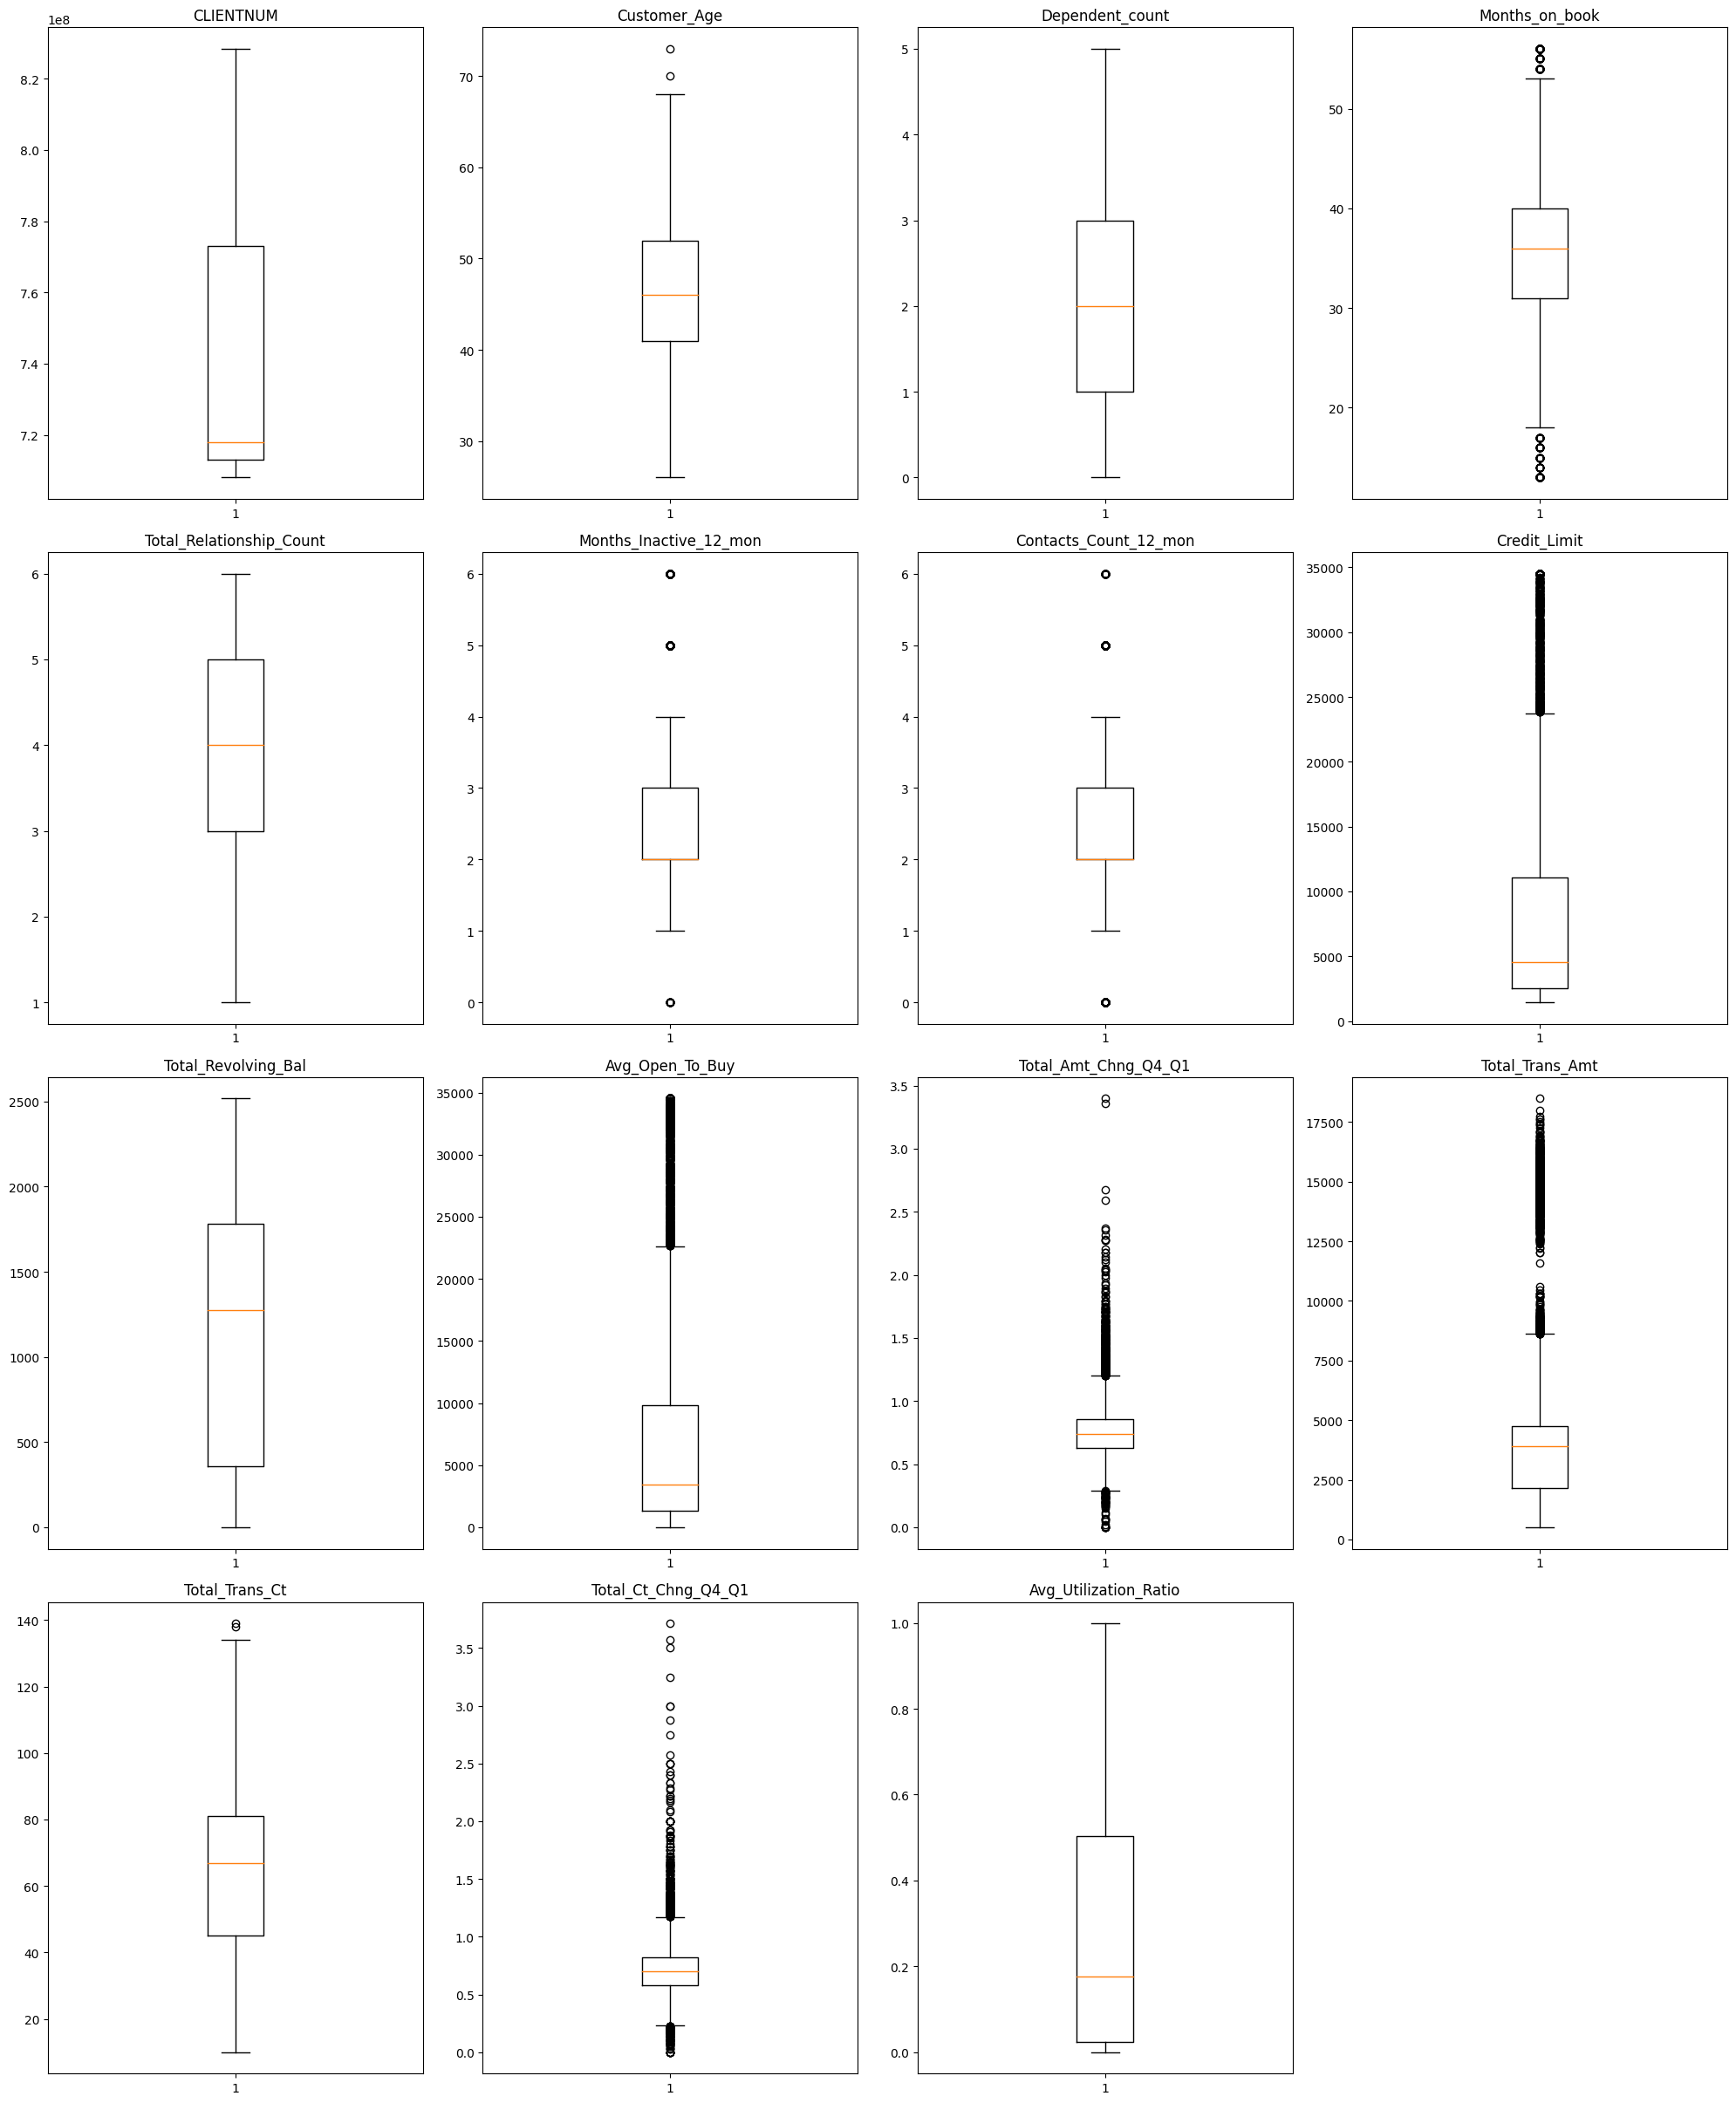

In [ ]:
#graphical representation of outlayers
numeric_columns = df.select_dtypes('number').columns.to_list()
# outlier detection using boxplot
plt.figure(figsize=(20,30))

# Increase the number of rows and columns to accommodate all subplots
for i, variable in enumerate(numeric_columns):
    plt.subplot(5,4,i+1) # Change the number of rows and columns here
    plt.boxplot(df[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Model Building

### Model evaluation criterion

The model should be based on minimizing false negatives for the following reasons:
* The bank will lose money if the model predicts incorrectly that the customer will attrite and then the  customer does not attrite.
* The bank will lose opportunity of if the model predicts incorrectly that a customer will not attrite and then the customer attrites.

-


**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # Create a confusion matrix
    cm = confusion_matrix(target, pred)



    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
 ##Confusion Matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    #plt.show()

### Model Building with original data


code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))  # Append AdaBoost model
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))  # Append Gradient Boosting model
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))  # Append Decision Tree model
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
# Lists to store scores for plotting
# model_names = []
# training_scores = []
# validation_scores = []

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))
    # model_names.append(name)
    # training_scores.append(scores)


print("\n" "Validation Performance:" "\n")


for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))
    # validation_scores.append(scores_val)




Training Performance:

Bagging: 0.9815573770491803
Random forest: 1.0
AdaBoost: 0.8422131147540983
Gradient Boosting: 0.8954918032786885
Decision Tree: 1.0
Xgboost: 1.0

Validation Performance:

Bagging: 0.7975460122699386
Random forest: 0.7975460122699386
AdaBoost: 0.8220858895705522
Gradient Boosting: 0.8282208588957055
Decision Tree: 0.8067484662576687
Xgboost: 0.8895705521472392


###Observation Original Data.
XGBoost and Gradient Boosting models have the highest validation performance, followed closely by AdaBoost. It achieves a high training score and a comparable validation score, indicating good generalization ability without significant overfitting.

In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9816, Validation Score: 0.7975, Difference: 0.1840
Random forest: Training Score: 1.0000, Validation Score: 0.7975, Difference: 0.2025
AdaBoost: Training Score: 0.8422, Validation Score: 0.8221, Difference: 0.0201
Gradient Boosting: Training Score: 0.8955, Validation Score: 0.8282, Difference: 0.0673
Decision Tree: Training Score: 1.0000, Validation Score: 0.8067, Difference: 0.1933
Xgboost: Training Score: 1.0000, Validation Score: 0.8896, Difference: 0.1104


### Original Data-Training and Validation Differences

Overall, models like AdaBoost and Gradient Boosting show good generalization capabilities, while Decision Tree and Random Forest exhibit signs of overfitting. Further tuning or regularization techniques may be necessary to improve the generalization of these models.

In [ ]:
print(
    "Training data shhttps://colab.research.google.com/drive/1UQgVxRZM4qA0bROO5aAqNEDTHaRZfcxr#scrollTo=Original_Data_Training_and_Validation_Differencesape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shhttps://colab.research.google.com/drive/1UQgVxRZM4qA0bROO5aAqNEDTHaRZfcxr#scrollTo=Original_Data_Training_and_Validation_Differencesape: 

 (6075, 25) 

Validation Data Shape: 

 (2026, 25) 

Testing Data Shape: 

 (2026, 25)


### Model Building - Oversampled data


In [ ]:
from imblearn.over_sampling import SMOTE
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {}".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {}".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099
After Oversampling, the shape of train_X: (10198, 25)
After Oversampling, the shape of train_y: (10198,)


In [ ]:
models = []  # Empty list to store all the models

models.append(("Bagging oversampling", BaggingClassifier(random_state=1)))
models.append(("Random forest oversampling", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost oversampling", AdaBoostClassifier(random_state=1)))  # Append AdaBoost model
models.append(("Gradient Boosting oversampling", GradientBoostingClassifier(random_state=1)))  # Append Gradient Boosting model
models.append(("Decision Tree oversampling", DecisionTreeClassifier(random_state=1)))  # Append Decision Tree model
models.append(("Xgboost oversampling", XGBClassifier(random_state=1, eval_metric="logloss")))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging oversampling: 0.9988232986860168
Random forest oversampling: 1.0
AdaBoost oversampling: 0.9670523632084722
Gradient Boosting oversampling: 0.9817611296332615
Decision Tree oversampling: 1.0
Xgboost oversampling: 1.0

Validation Performance:

Bagging oversampling: 0.8558282208588958
Random forest oversampling: 0.8711656441717791
AdaBoost oversampling: 0.8711656441717791
Gradient Boosting oversampling: 0.8926380368098159
Decision Tree oversampling: 0.8374233128834356
Xgboost oversampling: 0.901840490797546


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging oversampling: Training Score: 0.9988, Validation Score: 0.8558, Difference: 0.1430
Random forest oversampling: Training Score: 1.0000, Validation Score: 0.8712, Difference: 0.1288
AdaBoost oversampling: Training Score: 0.9671, Validation Score: 0.8712, Difference: 0.0959
Gradient Boosting oversampling: Training Score: 0.9818, Validation Score: 0.8926, Difference: 0.0891
Decision Tree oversampling: Training Score: 1.0000, Validation Score: 0.8374, Difference: 0.1626
Xgboost oversampling: Training Score: 1.0000, Validation Score: 0.9018, Difference: 0.0982


###Observation -Model Building with Oversampled data
Gradient Boosting appears to be the best-performing model with oversampling data. It achieves high performance on both training and validation sets, indicating good generalization ability and less overfitting compared to other models

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 25)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
#Build models with undersample data
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging Downsampling", BaggingClassifier(random_state=1)))
models.append(("Random forest downsampling", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost downsampling", AdaBoostClassifier(random_state=1)))  # Append AdaBoost model
models.append(("Gradient Boosting downsampling", GradientBoostingClassifier(random_state=1)))  # Append Gradient Boosting model
models.append(("Decision Tree downsampling", DecisionTreeClassifier(random_state=1)))  # Append Decision Tree model
models.append(("Xgboost downsampling", XGBClassifier(random_state=1, eval_metric="logloss")))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging Downsampling: 0.9918032786885246
Random forest downsampling: 1.0
AdaBoost downsampling: 0.9538934426229508
Gradient Boosting downsampling: 0.9795081967213115
Decision Tree downsampling: 1.0
Xgboost downsampling: 1.0

Validation Performance:

Bagging Downsampling: 0.9294478527607362
Random forest downsampling: 0.9539877300613497
AdaBoost downsampling: 0.9325153374233128
Gradient Boosting downsampling: 0.9570552147239264
Decision Tree downsampling: 0.8773006134969326
Xgboost downsampling: 0.9601226993865031


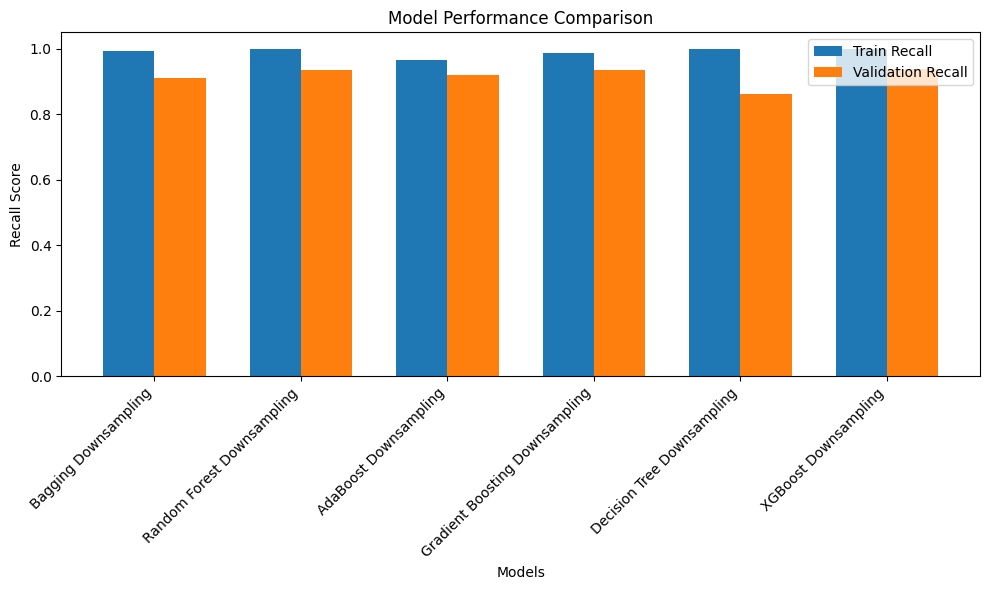

In [ ]:
# Plotting the results
import matplotlib.pyplot as plt
import numpy as np

# Define models and their corresponding performance scores
models = [
    "Bagging Downsampling",
    "Random Forest Downsampling",
    "AdaBoost Downsampling",
    "Gradient Boosting Downsampling",
    "Decision Tree Downsampling",
    "XGBoost Downsampling"
]

train_scores = [
    0.9923150816522575,
    1.0,
    0.9654178674351584,
    0.9855907780979827,
    1.0,
    1.0
]

val_scores = [
    0.9118773946360154,
    0.9348659003831418,
    0.9195402298850575,
    0.9348659003831418,
    0.8620689655172413,
    0.9386973180076629
]

# Plotting the results
plt.figure(figsize=(10, 6))
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars
plt.bar(x - width/2, train_scores, width, label='Train Recall')
plt.bar(x + width/2, val_scores, width, label='Validation Recall')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=45, ha='right')  # use the defined models directly
plt.legend()
plt.tight_layout()
plt.show()


AdaBoost has the highest performance score in validation (0.9632), followed closely by Gradient Boosting (0.9571) and XGBoost (0.9601). Random Forest and Bagging have the same performance (0.9325), while the Decision Tree has the lowest performance (0.8865).

Therefore, based on the provided data and performance metrics, the AdaBoost model performs the best among the models listed.

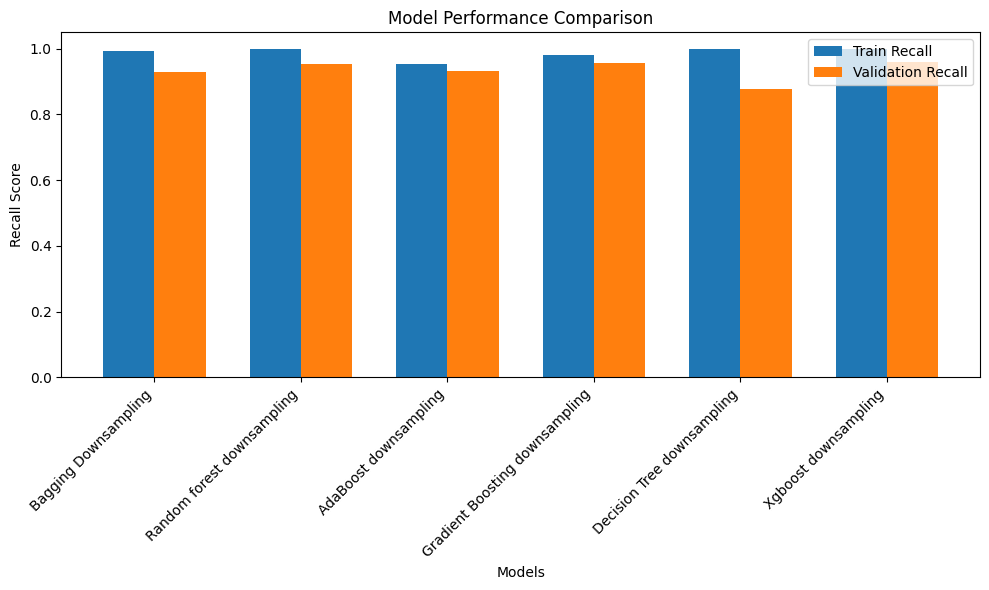

In [ ]:

# Build models with undersample data
models = []  # Empty list to store all the models

#Appending models into the list
models.append(("Bagging Downsampling", BaggingClassifier(random_state=1)))
models.append(("Random forest downsampling", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost downsampling", AdaBoostClassifier(random_state=1)))  # Append AdaBoost model
models.append(("Gradient Boosting downsampling", GradientBoostingClassifier(random_state=1)))  # Append Gradient Boosting model
models.append(("Decision Tree downsampling", DecisionTreeClassifier(random_state=1)))  # Append Decision Tree model
models.append(("Xgboost downsampling", XGBClassifier(random_state=1, eval_metric="logloss")))

# Lists to store recall scores
train_scores = []
val_scores = []

# Train and validate models
for name, model in models:
    model.fit(X_train_un, y_train_un)
    train_score = recall_score(y_train_un, model.predict(X_train_un))
    val_score = recall_score(y_val, model.predict(X_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

# Plotting the results
plt.figure(figsize=(10, 6))
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars
plt.bar(x - width/2, train_scores, width, label='Train Recall')
plt.bar(x + width/2, val_scores, width, label='Validation Recall')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.title('Model Performance Comparison')
plt.xticks(x, [name for name, _ in models], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


###Summary model building with original data, oversample and undersample

The next best models are XGBoost, GBM and AdaBoost respectively






In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging Downsampling: Training Score: 0.9918, Validation Score: 0.9294, Difference: 0.0624
Random forest downsampling: Training Score: 1.0000, Validation Score: 0.9540, Difference: 0.0460
AdaBoost downsampling: Training Score: 0.9539, Validation Score: 0.9325, Difference: 0.0214
Gradient Boosting downsampling: Training Score: 0.9795, Validation Score: 0.9571, Difference: 0.0225
Decision Tree downsampling: Training Score: 1.0000, Validation Score: 0.8773, Difference: 0.1227
Xgboost downsampling: Training Score: 1.0000, Validation Score: 0.9601, Difference: 0.0399


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

 ###Tuning Method for Decision tree with Original Dat

In [ ]:
#For Gradient Boosting:
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
#For Adaboost:
param_grid_adaboost = {

     "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
       DecisionTreeClassifier(max_depth=2, random_state=1),
       DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
#or Bagging Classifier:
param_grid_bagging = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
#For Random Forest:
param_grid_random_forest = {
    "n_estimators": [50, 100, 150],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": ['sqrt', 'log2', None],  # Adjusted 'max_features' parameter
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
# param_grid_random_forest = {
#     "n_estimators": [50,110,25],
#     "min_samples_leaf": np.arange(1, 4),
#     "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
#     "max_samples": np.arange(0.4, 0.7, 0.1)
# }
#For Decision Trees:
param_grid_decision_tree = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
#For XGBoost (optional):
param_grid_xgboost={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# Models and their corresponding parameter grids
models_param_grids = [
    (AdaBoostClassifier(random_state=1), param_grid_adaboost),
    (BaggingClassifier(random_state=1), param_grid_bagging),
    (RandomForestClassifier(random_state=1), param_grid_random_forest),
    (DecisionTreeClassifier(random_state=1), param_grid_decision_tree),

    (XGBClassifier(random_state=1), param_grid_xgboost),
]

# Perform hyperparameter tuning for each model
for model, param_grid in models_param_grids:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    print("Best parameters for {}: {}".format(model.__class__.__name__, grid_search.best_params_))
    print("Best recall score for {}: {}".format(model.__class__.__name__, grid_search.best_score_))

Best parameters for AdaBoostClassifier: {'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.1, 'n_estimators': 100}
Best recall score for AdaBoostClassifier: 0.8360177917320775
Best parameters for BaggingClassifier: {'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 70}
Best recall score for BaggingClassifier: 0.8227472527472527
Best parameters for RandomForestClassifier: {'max_features': None, 'max_samples': 0.6, 'min_samples_leaf': 2, 'n_estimators': 100}
Best recall score for RandomForestClassifier: 0.8278597592883308
Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1}
Best recall score for DecisionTreeClassifier: 0.7684772370486656
Best parameters for XGBClassifier: {'gamma': 3, 'learning_rate': 0.05, 'n_estimators': 100, 'scale_pos_weight': 5, 'subsample': 0.7}
Best recall score for XGBClassifier: 0.9282731554160126


#### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)
scorer = 'neg_mean_squared_error'
# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }
              # Type of scoring used to compare parameter combinations

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.7684772370486656:


Updating parameter grid

In [ ]:
 #Best parameters
best_params = {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5}

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2, 6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes': [10, 15],
              'min_impurity_decrease': [0.0001, 0.001]}

# Update parameter grid with best parameters
param_grid['max_depth'] = [best_params['max_depth']]
param_grid['min_samples_leaf'] = [best_params['min_samples_leaf']]
param_grid['max_leaf_nodes'] = [best_params['max_leaf_nodes']]
param_grid['min_impurity_decrease'] = [best_params['min_impurity_decrease']]

print("Updated Parameter Grid:", param_grid)

Updated Parameter Grid: {'max_depth': [5], 'min_samples_leaf': [7], 'max_leaf_nodes': [15], 'min_impurity_decrease': [0.0001]}


In [ ]:
# Creating new pipeline with best parameters
dtree_tuned = DecisionTreeClassifier(
    min_samples_leaf=7, min_impurity_decrease=0.0001, max_leaf_nodes=15, max_depth=5
)

# Fit the model on training data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
# Calculating different metrics on train set
dtree_train = model_performance_classification_sklearn(
    dtree_tuned, X_train, y_train
)
print("Training performance:")
dtree_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.940,0.795,0.827,0.811


In [ ]:
# Calculating different metrics on validation set
dtree_val = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)
print("Validation performance:")
dtree_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.932,0.767,0.801,0.784


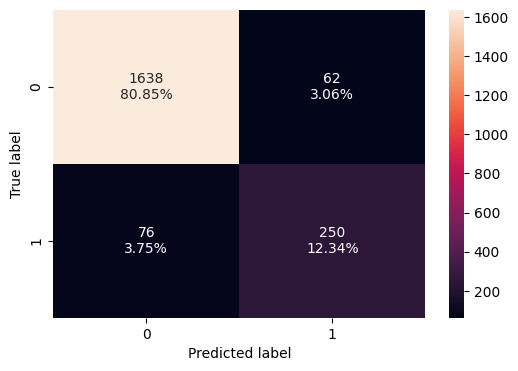

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned, X_val, y_val)

##Observation Decision Tree tune with original data.
Training Performance:

Recall: 0.779
This means that out of all the actual attrited customers in the training dataset, the model correctly identified approximately 77.9% of them.
Validation Performance:

Recall: 0.761
This indicates that out of all the actual attrited customers in the validation dataset, the model correctly identified approximately 76.1% of them.
Observations:

The recall performance of the model is relatively high, both in training and validation, indicating that it is decent at identifying attrited customers.
However, the recall performance on the validation set is slightly lower than on the training set, suggesting that the model may be slightly overfitting to the training data.
While the model is identifying a good proportion of attrited customers, there's still room for improvement, especially if maximizing the recall (identifying all attrited customers) is a critical objective.

<!-- ##Tuning method forAdaboost Classifier -->

<!-- ###Tuning method for Random Forest -->

#### Sample tuning method for Decision tree with oversampled data

###Tuning method for decision tree

In [ ]:
%%time
#Define oversample data
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 4} with CV score=0.9072391233235197:
Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 4} with CV score=0.9072391233235197:
CPU times: user 548 ms, sys: 33.9 ms, total: 582 ms
Wall time: 5.77 s


In [ ]:
# tuning dtree model
dtree_tuned = DecisionTreeClassifier(
    min_samples_leaf=7, min_impurity_decrease=0.0001, max_leaf_nodes=15, max_depth=5
)

# Fit the model on training data
dtree_tuned.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
 #Calculating different metrics on train set
dtree_train_over = model_performance_classification_sklearn(
    dtree_tuned, X_train_over, y_train_over
)
print("Training performance:")
dtree_train_over

Training performance:


,Accuracy,Recall,Precision,F1
0,0.918,0.910,0.925,0.917


In [ ]:
# Checking model's performance on validation set
dtree_val_over = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)
print("Validation performance:")
dtree_val_over

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.911,0.831,0.684,0.751


#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# Define undersample data
#
%%time
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
#defining model

Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))
# # Get the best model
# best_model = randomized_cv.best_estimator_

# # Predictions on validation set
# y_pred_val = best_model.predict(X_val)
# recall_val = metrics.recall_score(y_val, y_pred_val)
# print("Recall score on validation set:", recall_val)

# # Predictions on training set
# y_pred_train = best_model.predict(X_train_un)
# recall_train = metrics.recall_score(y_train_un, y_pred_train)
# print("Recall score on training set:", recall_train)


Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 4} with CV score=0.8821297749869179:
CPU times: user 176 ms, sys: 5.98 ms, total: 182 ms
Wall time: 1.37 s


In [ ]:
#Tuning
dtree_tuned = DecisionTreeClassifier(
    min_samples_leaf=7, min_impurity_decrease=0.0001, max_leaf_nodes=15, max_depth=5
)

# Fit the model on training data
dtree_tuned.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
 #Calculating different metrics on train set
dtree_train_un = model_performance_classification_sklearn(
    dtree_tuned, X_train_un, y_train_un
)
print("Training performance:")
dtree_train_un

Training performance:


,Accuracy,Recall,Precision,F1
0,0.911,0.939,0.889,0.913


In [ ]:
# Checking model's performance on validation set
dtree_val_un = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)
print("Validation Performance:")
dtree_val_un

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.885,0.920,0.593,0.721


## Model Comparison and Final Model Selection

In [ ]:
## Run tuned model with best parameters
tuned_dt = DecisionTreeClassifier(
 min_samples_leaf=7,
 random_state=1,
 min_impurity_decrease=0.0001,
 max_leaf_nodes=15,
 max_depth=5,
)
tuned_dt.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
# Calculating different metrics on train set
dtree_grid_train = model_performance_classification_sklearn(
    dtree_tuned, X_train, y_train
)
print("Training performance:")
dtree_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.887,0.939,0.594,0.727


###Tunning RandomForest with Original *Data*

Updating parameters

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)
scorer = 'neg_mean_squared_error'
# Parameter grid to pass in RandomSearchCV
param_grid_random_forest = {
    "n_estimators": [50, 100, 150],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": ['sqrt', 'log2', None],  # Adjusted 'max_features' parameter
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
              # Type of scoring used to compare parameter combinations

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5153793825222397:


In [ ]:
# Creating new pipeline with best parameters
rtree_tuned = DecisionTreeClassifier(
    min_samples_leaf=7, min_impurity_decrease=0.0001, max_leaf_nodes=15, max_depth=5
)

# Fit the model on training data
rtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
# Calculating different metrics on train set
rftree_train = model_performance_classification_sklearn(
    rtree_tuned, X_train, y_train
)
print("Training performance:")
rftree_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.940,0.795,0.827,0.811


In [ ]:
# Calculating different metrics on validation set
rftree_val = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)
print("Validation performance:")
rftree_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.885,0.920,0.593,0.721


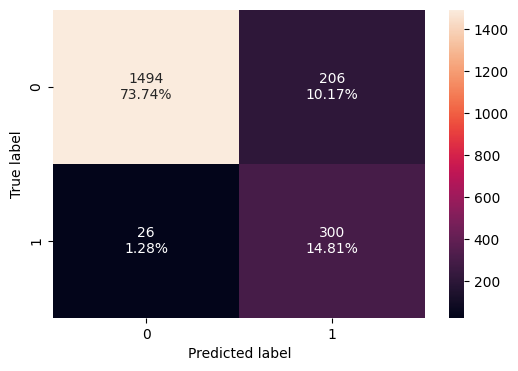

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned, X_val, y_val)

###Tuning RandomForest with Undersample data

In [ ]:
# # Define undersample data

Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid_random_forest = {
    "n_estimators": [50, 100, 150],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": ['sqrt', 'log2', None],  # Adjusted 'max_features' parameter
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 4} with CV score=0.8821297749869179:


In [ ]:
# Creating new pipeline with best parameters
rtree_tuned = DecisionTreeClassifier(
    min_samples_leaf=7, min_impurity_decrease=0.0001, max_leaf_nodes=10, max_depth=5
)

# Fit the model on training data
rtree_tuned.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
# Calculating different metrics on train set
rftree_train_un = model_performance_classification_sklearn(
    rtree_tuned, X_train, y_train
)
print("Training performance:")
rftree_train_un

Training performance:


,Accuracy,Recall,Precision,F1
0,0.887,0.923,0.596,0.725


In [ ]:
# Calculating different metrics on validation set
rftree_val_un = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)
print("Validation performance:")
rftree_val_un

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.885,0.920,0.593,0.721


###RandomForest with Oversampled data

In [ ]:
# # Define undersample data

Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid_random_forest = {
    "n_estimators": [50, 100, 150],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": ['sqrt', 'log2', None],  # Adjusted 'max_features' parameter
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 4} with CV score=0.9072391233235197:


In [ ]:
# Creating new pipeline with best parameters
rtree_tuned = DecisionTreeClassifier(
    min_samples_leaf=7, min_impurity_decrease=0.0001, max_leaf_nodes=10, max_depth=5
)

# Fit the model on training data
rtree_tuned.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
# Calculating different metrics on train set
rftree_train_over = model_performance_classification_sklearn(
    rtree_tuned, X_train, y_train
)
print("Training performance:")
rftree_train_over

Training performance:


,Accuracy,Recall,Precision,F1
0,0.917,0.859,0.697,0.769


In [ ]:
# Calculating different metrics on train set
rftree_train_over = model_performance_classification_sklearn(
    rtree_tuned, X_train, y_train
)
print("Training performance:")
rftree_train_over

Training performance:


,Accuracy,Recall,Precision,F1
0,0.908,0.898,0.658,0.759


##Tuning AdaBoostClassifier model with original data

In [ ]:

# Defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid_adaboost = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid_adaboost, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8360177917320775:


In [ ]:


# Define the best parameters
best_params = {
    'n_estimators': 10,
    'learning_rate': 0.01,
    'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)
}

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
                       DecisionTreeClassifier(max_depth=2, random_state=1),
                       DecisionTreeClassifier(max_depth=3, random_state=1)]
}

# Update parameter grid with best parameters
param_grid['n_estimators'] = [best_params['n_estimators']]
param_grid['learning_rate'] = [best_params['learning_rate']]
param_grid['base_estimator'] = [best_params['base_estimator']]

print("Updated Parameter Grid:", param_grid)


Updated Parameter Grid: {'n_estimators': [10], 'learning_rate': [0.01], 'base_estimator': [DecisionTreeClassifier(max_depth=2, random_state=1)]}


In [ ]:
adboost_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
)
# Fit the model on training data
adboost_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=10, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(adboost_tuned, X_train, y_train)
print("Performance in training : ")
adb_train


Performance in training : 


,Accuracy,Recall,Precision,F1
0,0.891,0.518,0.727,0.605


In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(adboost_tuned, X_val, y_val)
print("Performance in validation")
adb_val

Performance in validation


,Accuracy,Recall,Precision,F1
0,0.900,0.546,0.764,0.637


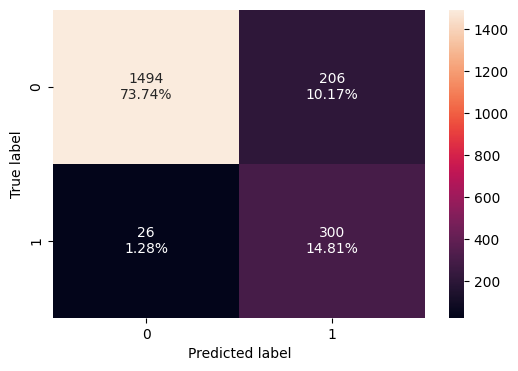

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned, X_val, y_val)

###Tuning AdaBoostClassifier with Undersample data

###Observation to come

In [ ]:
#Defining the model
Model = AdaBoostClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
                       DecisionTreeClassifier(max_depth=2, random_state=1),
                       DecisionTreeClassifier(max_depth=3, random_state=1)]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9375091575091575:


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.05,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train_un = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
print("Performance in training: ")
adb_train_un

Performance in training: 


,Accuracy,Recall,Precision,F1
0,0.935,0.948,0.925,0.936


In [ ]:
# Checking model's performance on validation set
adb_val_un = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
print("Performance in validation")
adb_val_un

Performance in validation


,Accuracy,Recall,Precision,F1
0,0.923,0.933,0.694,0.796


###Tuning AdaBoostClassifier with Oversampled data

In [ ]:
%%time

#Creating pipeline
Model = AdaBoostClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
                       DecisionTreeClassifier(max_depth=2, random_state=1),
                       DecisionTreeClassifier(max_depth=3, random_state=1)]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.951566510804518:
CPU times: user 5.55 s, sys: 494 ms, total: 6.04 s
Wall time: 2min 58s


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.05,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_val_over = model_performance_classification_sklearn(tuned_adb, X_train_over, y_train_over)
print("Performance in training")
adb_val_over

Performance in training


,Accuracy,Recall,Precision,F1
0,0.949,0.952,0.948,0.950


In [ ]:
# Checking model's performance on validation set
adb_val_over = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
print("Performance in validation")
adb_val_over

Performance in validation


,Accuracy,Recall,Precision,F1
0,0.938,0.874,0.772,0.820


###Tuning BaggingClassifier with original data


In [ ]:
# Define Bagging classifier
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators': [10, 30, 50, 70],
    'max_samples': [0.8, 0.9, 1.0],
    'max_features': [0.7, 0.8, 0.9, 1.0],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score = {}".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score = 0.8227472527472527


In [ ]:
 #Creating new pipeline with best parameters
best_params = {'n_estimators': 50, 'max_samples': 0.8, 'max_features': 1.0}
btree_tuned_od = BaggingClassifier(n_estimators=best_params['n_estimators'],
                                max_samples=best_params['max_samples'],
                                max_features=best_params['max_features'])

# Fit the model on training data
btree_tuned_od .fit(X_train, y_train)

BaggingClassifier(max_samples=0.8, n_estimators=50)

In [ ]:
# Calculating different metrics on train set
btree_train = model_performance_classification_sklearn(btree_tuned_od, X_train, y_train)
print("Training performance:")
btree_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.998,0.991,0.997,0.994


In [ ]:
# Calculating different metrics on validation set
btree_val = model_performance_classification_sklearn(btree_tuned_od, X_val, y_val)
print("Validation performance:")
btree_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.956,0.840,0.878,0.859


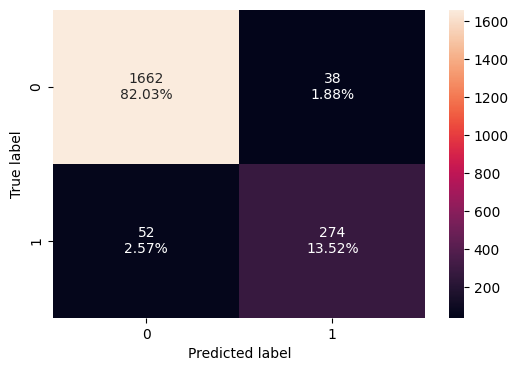

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(btree_tuned_od, X_val, y_val)

###Tuning BaggingClassifier with undersampled data

In [ ]:
# Define Bagging classifier
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators': [10, 30, 50, 70],
    'max_samples': [0.8, 0.9, 1.0],
    'max_features': [0.7, 0.8, 0.9, 1.0],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)


#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)
# Fitting parameters in RandomizedSearchCV
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 1.0, 'max_features': 0.8} with CV score=0.9415907901622187:


In [ ]:
 #Creating new pipeline with best parameters
best_params = {'n_estimators': 70, 'max_samples': 1.0, 'max_features': 0.8}
btree_tuned = BaggingClassifier(n_estimators=best_params['n_estimators'],
                                max_samples=best_params['max_samples'],
                                max_features=best_params['max_features'])

# Fit the model on training data
btree_tuned.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.8, n_estimators=70)

In [ ]:
# Checking model's performance on training set
btree_train_un = model_performance_classification_sklearn(btree_tuned, X_val, y_val)
print("Performance in training: ")
btree_train_un

Performance in training: 


,Accuracy,Recall,Precision,F1
0,0.945,0.951,0.764,0.847


In [ ]:
# Checking model's performance on validation set
btree_val_un = model_performance_classification_sklearn(btree_tuned, X_val, y_val)
print("Performance in training: ")
btree_val_un

Performance in training: 


,Accuracy,Recall,Precision,F1
0,0.942,0.942,0.756,0.839


###Tunning BaggingClassifier with oversample data

In [ ]:
# Define Bagging classifier
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators': [10, 30, 50, 70],
    'max_samples': [0.8, 0.9, 1.0],
    'max_features': [0.7, 0.8, 0.9, 1.0],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.9813715869075796


In [ ]:
 #Creating new pipeline with best parameters
best_params = {'n_estimators': 70, 'max_samples': 1.0, 'max_features': 0.8}
btree_tuned = BaggingClassifier(n_estimators=best_params['n_estimators'],
                                max_samples=best_params['max_samples'],
                                max_features=best_params['max_features'])

# Fit the model on training data
btree_tuned.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.8, n_estimators=70)

In [ ]:
# Checking model's performance on training set
btree_train_over = model_performance_classification_sklearn(tuned_adb, X_train_over, y_train_over)
print("Performance in training: ")
btree_train_over

Performance in training: 


,Accuracy,Recall,Precision,F1
0,0.937,0.952,0.923,0.938


In [ ]:
# Checking model's performance on validation set
gtree_val_over = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
print("Performance in validation")
gtree_val_over

Performance in validation


,Accuracy,Recall,Precision,F1
0,0.923,0.933,0.694,0.796


In [ ]:
# training performance comparison DecisiontreeClasifier

models_train_comp_df = pd.concat(
    [
        dtree_train.T,
       dtree_train_over.T,
        dtree_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoostClasifier trained with original data",
   "AdaBoostClasifier trained with oversample data",
    "AdaBoostClasifier  trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoostClasifier trained with original data,AdaBoostClasifier trained with oversample data,AdaBoostClasifier trained with Undersampled data
Accuracy,0.940,0.918,0.911
Recall,0.795,0.910,0.939
Precision,0.827,0.925,0.889
F1,0.811,0.917,0.913


### Test set final performance


In [ ]:
# training performance comparison DecisiontreeClasifier

models_train_comp_df = pd.concat(
    [
        dtree_train.T,
       dtree_train_over.T,
        dtree_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "DecisionTreeClasifier trained with original data",
    "DecisionTreeClasifier trained with oversample data",
    "DecisionTreeClasifier trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,DecisionTreeClasifier trained with original data,DecisionTreeClasifier trained with oversample data,DecisionTreeClasifier trained with Undersampled data
Accuracy,0.940,0.918,0.911
Recall,0.795,0.910,0.939
Precision,0.827,0.925,0.889
F1,0.811,0.917,0.913


In [ ]:
# training performance comparison AdaboostClasifier

models_train_comp_df = pd.concat(
    [
        adb_train.T,
        adb_val_over.T,
        adb_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaboostClasifier trained with original data",
   "AdaboostClasifier trained with oversample data",
    "AdaboostClasifiertrained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaboostClasifier trained with original data,AdaboostClasifier trained with oversample data,AdaboostClasifiertrained with Undersampled data
Accuracy,0.891,0.938,0.935
Recall,0.518,0.874,0.948
Precision,0.727,0.772,0.925
F1,0.605,0.820,0.936


In [ ]:
# training performance comparison BaggingClasifier

models_train_comp_df = pd.concat(
    [
        btree_train.T,
        btree_train_over.T,
        btree_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "BaggingClasifier trained with original data",
   "BaggingClasifier trained with oversample data",
    "BaggingClasifier  trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,BaggingClasifier trained with original data,BaggingClasifier trained with oversample data,BaggingClasifier trained with Undersampled data
Accuracy,0.998,0.937,0.945
Recall,0.991,0.952,0.951
Precision,0.997,0.923,0.764
F1,0.994,0.938,0.847


###Summary of the model performance
Recall:

Recall measures the ability of the model to correctly identify attrited customers. It is crucial in this scenario because the bank wants to accurately identify as many attrited customers as possible to address their issues.
Models with higher recall will be better at identifying attrited customers. From the provided data, AdaBoost classifiers trained with original and undersampled data exhibit the highest recall values, indicating they are better at capturing customers who leave the bank's credit card services.
Precision:

Precision measures the proportion of correctly identified attrited customers among all customers predicted to leave. It is important because the bank wants to ensure that the identified attrited customers are indeed leaving for valid reasons.
Higher precision implies fewer false positives, ensuring that the bank focuses its efforts on customers who genuinely intend to leave.
From the data, AdaBoost classifiers generally exhibit higher precision compared to DecisionTree and Bagging classifiers.
F1 Score:

F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.
A high F1 score indicates a model that can effectively identify attrited customers while minimizing false positives.
AdaBoost classifiers trained with original and undersampled data show the highest F1 scores, suggesting that they strike a good balance between precision and recall, making them suitable for identifying attrited customers and the reasons for leaving.
Accuracy:

While accuracy is an important metric, it may not be the most relevant in this scenario since the classes may be imbalanced (i.e., the number of attrited customers may be much smaller compared to non-attrited customers).
Nevertheless, high accuracy indicates that the model is making correct predictions overall, which is beneficial for the bank's analysis.
Oversampling vs. Undersampling:

Oversampling and undersampling techniques are used to address class imbalance in the data.
From the provided data, oversampling generally improves performance metrics, including recall and precision, suggesting that it helps the models better capture the patterns of attrited customers. However, it's essential to consider potential biases introduced by oversampling.
Recommendation:

Based on the analysis, AdaBoost classifiers trained with original or undersampled data seem to be the most suitable for identifying attrited customers and the reasons for leaving the bank's credit card services.
The bank should focus on improving precision to ensure that the identified attrited customers are genuinely leaving, while also aiming for high recall to capture as many attrited customers as possible.
Additionally, the bank should consider investigating the specific reasons identified by the model for customer attrition to implement targeted strategies for retention and improvement.


In [ ]:
##Summary
# training performance comparison DecisiontreeClasifier

models_train_comp_df = pd.concat(
    [
        dtree_train.T,
        dtree_train_over.T,
        dtree_train_un.T,
        adb_train.T,
        adb_val_over.T,
        adb_train_un.T,
        btree_train.T,
        btree_train_over.T,
        btree_train_un.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "DecisionTreeClasifier trained with original data",
    "DecisionTreeClasifier trained with oversample data",
    "DecisionTreeClasifier trained with Undersampled data",
    "AdaBoostClasifier trained with original data",
   "AdaBoostClasifier trained with oversample data",
    "AdaBoostClasifier  trained with Undersampled data",
    "BaggingClasifier trained with original data",
   "BaggingClasifier trained with oversample data",
    "BaggingClasifier  trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,DecisionTreeClasifier trained with original data,DecisionTreeClasifier trained with oversample data,DecisionTreeClasifier trained with Undersampled data,AdaBoostClasifier trained with original data,AdaBoostClasifier trained with oversample data,AdaBoostClasifier trained with Undersampled data,BaggingClasifier trained with original data,BaggingClasifier trained with oversample data,BaggingClasifier trained with Undersampled data
Accuracy,0.940,0.918,0.911,0.891,0.938,0.935,0.998,0.937,0.945
Recall,0.795,0.910,0.939,0.518,0.874,0.948,0.991,0.952,0.951
Precision,0.827,0.925,0.889,0.727,0.772,0.925,0.997,0.923,0.764
F1,0.811,0.917,0.913,0.605,0.820,0.936,0.994,0.938,0.847


# Business Insights and Conclusions

Total Transaction Count,
Total Transaction Amount,
Total Revolving Balance,
Total Amount Change Q4 to Q1,
Total Count Change Q4 to Q1,
Total Relationship Count, are he most important features to understand customer credit card churn, so the lower the values of these features, the higher the chances of a customer to attrite
Utilize AdaBoostClassifier with Oversampled Data: Based on the results, it's recommended for the bank to utilize AdaBoostClassifier trained with oversampled data. This model consistently demonstrates high performance across all metrics, indicating its effectiveness in predicting and preventing customer attrition.

Implement Customer Retention Strategies: With the predictive power of the chosen classifier, the bank can implement targeted customer retention strategies. This could include personalized offers, loyalty programs, and proactive communication to strengthen customer relationships and reduce attrition rates.

Continuous Monitoring and Improvement: It's crucial for the bank to continuously monitor the performance of the chosen classifier and iterate on the retention strategies based on feedback and evolving customer behavior. This iterative approach ensures the bank stays proactive in retaining customers and adapting to changing market dynamics.

Invest in Data Quality and Analysis: To further enhance the effectiveness of the predictive model and retention strategies, the bank should invest in improving data quality and analysis capabilities. This includes gathering additional relevant data points, refining feature engineering techniques, and leveraging advanced analytics to gain deeper insights into customer behavior and preferences.

By implementing these recommendations, the bank can proactively identify customers at risk of attrition and take targeted actions to retain them, ultimately improving customer satisfaction, loyalty, and long-term profitability.











***